In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [878]:
df = pd.read_csv('../data/csv/Tipo di località e paese di residenza (IT1,122_54_DF_DCSC_TUR_10,1.0).csv')
df['OBS_VALUE'] = df['OBS_VALUE'] / 1000000
df.head()

DATAFLOW FREQ REF_AREA DATA_TYPE ADJUSTMENT  \
0  IT1:122_54_DF_DCSC_TUR_10(1.0)    A       IT        AR          N   
1  IT1:122_54_DF_DCSC_TUR_10(1.0)    A       IT        AR          N   
2  IT1:122_54_DF_DCSC_TUR_10(1.0)    A       IT        AR          N   
3  IT1:122_54_DF_DCSC_TUR_10(1.0)    A       IT        AR          N   
4  IT1:122_54_DF_DCSC_TUR_10(1.0)    A       IT        AR          N   

  TYPE_ACCOMMODATION ECON_ACTIVITY_NACE_2007 COUNTRY_RES_GUESTS LOCALITY_TYPE  \
0                ALL                 551_553                 IT           ALL   
1                ALL                 551_553                 IT           ALL   
2                ALL                 551_553                 IT           ALL   
3                ALL                 551_553                 IT           ALL   
4                ALL                 551_553                 IT           ALL   

  URBANIZ_DEGREE  ... NOTE_ECON_ACTIVITY_NACE_2007 NOTE_COUNTRY_RES_GUESTS  \
0            ALL  ...                          NaN                     NaN   
1            ALL  ...                          NaN                     NaN   
2            ALL  ...                          NaN                     NaN   
3            ALL  ...                          NaN                     NaN   
4            ALL  ...                          NaN                     NaN   

   NOTE_LOCALITY_TYPE  NOTE_URBANIZ_DEGREE  NOTE_COASTAL_AREA  \
0                 NaN                  NaN                NaN   
1                 NaN                  NaN                NaN   
2                 NaN                  NaN                NaN   
3                 NaN                  NaN                NaN   
4                 NaN                  NaN                NaN   

   NOTE_SIZE_BY_NUMBER_ROOMS  NOTE_TIME_PERIOD  BASE_PER  UNIT_MEAS  UNIT_MULT  
0                        NaN               NaN       NaN        NaN        NaN  
1                        NaN               NaN       NaN        NaN        NaN  
2                        NaN               NaN       NaN        NaN        NaN  
3                        NaN               NaN       NaN        NaN        NaN  
4                        NaN               NaN       NaN        NaN        NaN  

[5 rows x 30 columns]

OBS_VALUE
TIME_PERIOD            
2018         128.100932
2019         131.381653
2020          55.702138
2021          78.670967
2022         118.514633

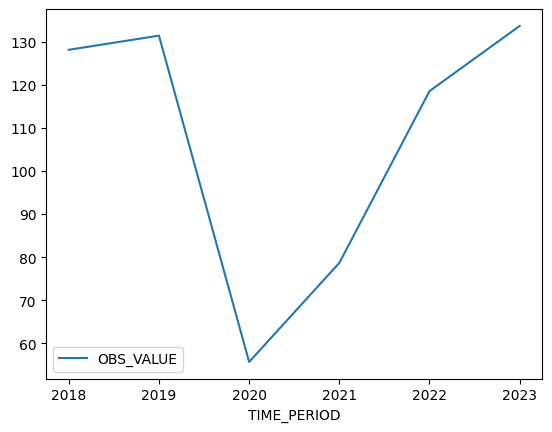

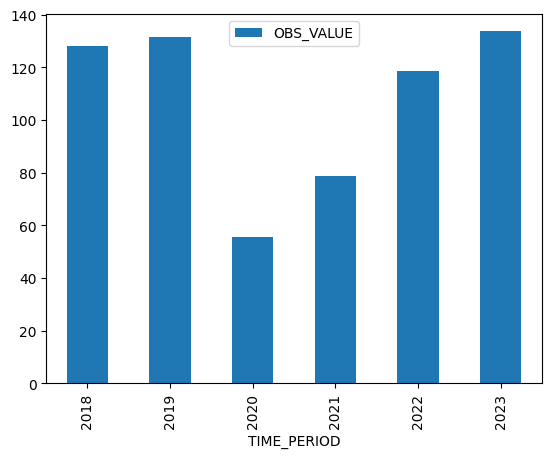

In [879]:
arrivals_per_year = df[(df['COUNTRY_RES_GUESTS'] == 'WORLD') & (df['TYPE_ACCOMMODATION'] == 'ALL') & (df['DATA_TYPE'] == 'AR') & (df['TIME_PERIOD'].apply(str).apply(len) <= 4) & (df['LOCALITY_TYPE'] == 'ALL')]
arrivals = arrivals_per_year[['OBS_VALUE', 'TIME_PERIOD']].set_index('TIME_PERIOD')
arrivals.plot()
arrivals.plot.bar()
arrivals.head()

OBS_VALUE
TIME_PERIOD            
2018         428.844937
2019         436.739271
2020         208.447085
2021         289.178142
2022         412.008532

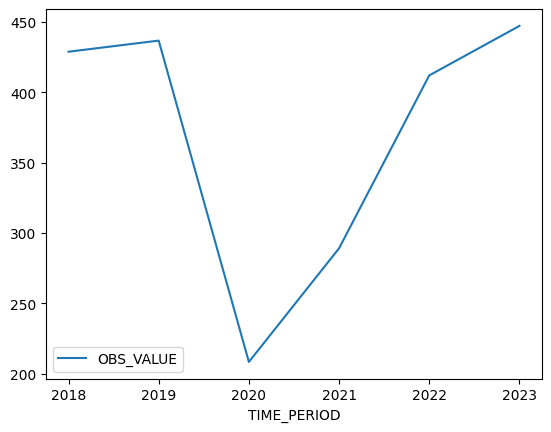

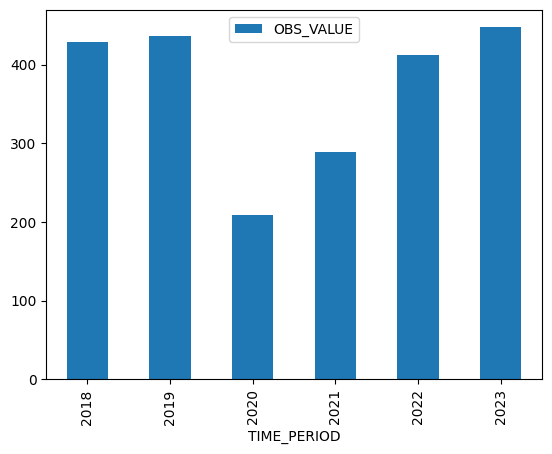

In [880]:
nights_spent_per_year = df[(df['COUNTRY_RES_GUESTS'] == 'WORLD') & (df['TYPE_ACCOMMODATION'] == 'ALL') & (df['DATA_TYPE'] == 'NI') & (df['TIME_PERIOD'].apply(str).apply(len) <= 4) & (df['LOCALITY_TYPE'] == 'ALL')]
nights_spent = nights_spent_per_year[['OBS_VALUE', 'TIME_PERIOD']].set_index('TIME_PERIOD')
nights_spent.plot()
nights_spent.plot.bar()
nights_spent.head()

## ARRIVALS AND NIGHTS SPENT PER YEAR

In [881]:
def get_pre(d):
  d[d.index <= 2019]
def get_curr(d):
  d[(d.index >= 2020) & (d.index <= 2021)]
def get_post(d):
  d[d.index >= 2022]

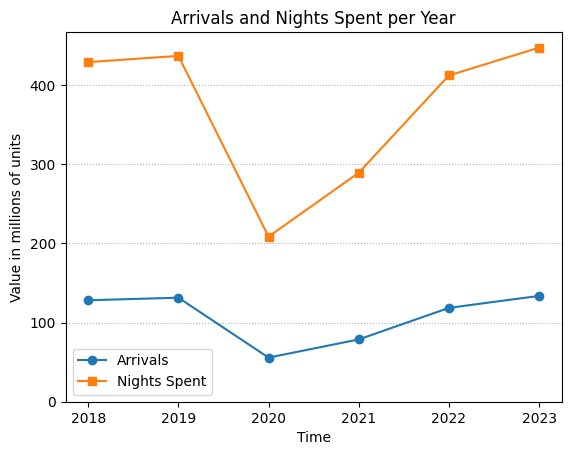

In [882]:
plt.plot(arrivals.index, arrivals['OBS_VALUE'], 'o-', label='Arrivals')
plt.plot(nights_spent.index, nights_spent['OBS_VALUE'], 's-', label='Nights Spent')

plt.ylabel("Value in millions of units")
plt.xlabel("Time")
plt.legend()
plt.title("Arrivals and Nights Spent per Year")
plt.grid(True, axis='y', linestyle=':')
plt.ylim(bottom=0)

plt.show()

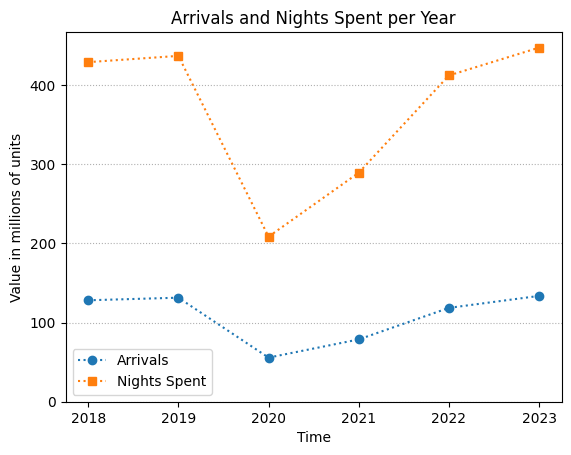

In [883]:
plt.plot(arrivals.index, arrivals['OBS_VALUE'], 'o:', label='Arrivals')
plt.plot(nights_spent.index, nights_spent['OBS_VALUE'], 's:', label='Nights Spent')

plt.ylabel("Value in millions of units")
plt.xlabel("Time")
plt.legend()
plt.title("Arrivals and Nights Spent per Year")
plt.grid(True, axis='y', linestyle=':')
plt.ylim(bottom=0)

plt.show()

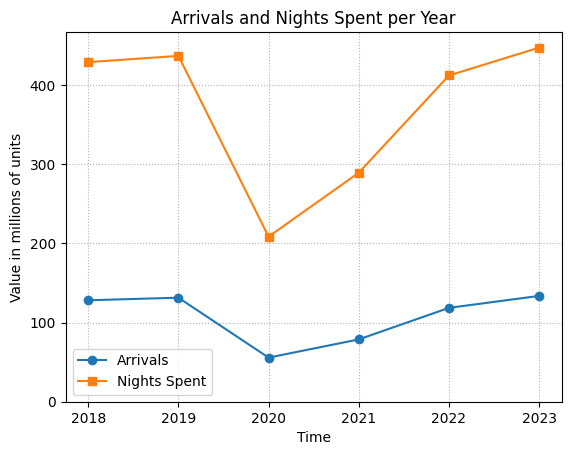

In [884]:
plt.plot(arrivals.index, arrivals['OBS_VALUE'], 'o-', label='Arrivals')
plt.plot(nights_spent.index, nights_spent['OBS_VALUE'], 's-', label='Nights Spent')

# Adding labels and title
plt.ylabel("Value in millions of units")
plt.xlabel("Time")
plt.legend()
plt.title("Arrivals and Nights Spent per Year")
plt.grid(True, linestyle=':')
plt.ylim(bottom=0)

plt.show()

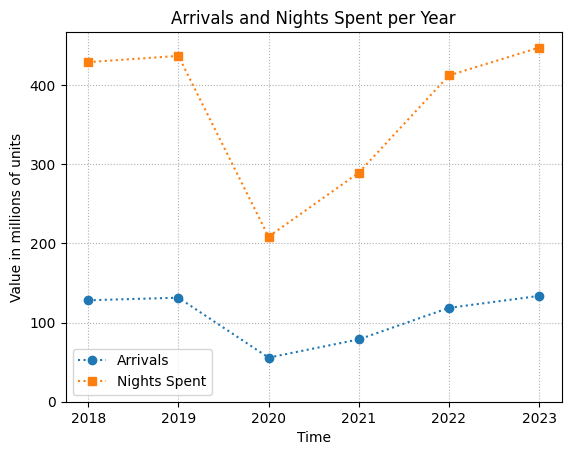

In [885]:
plt.plot(arrivals.index, arrivals['OBS_VALUE'], 'o:', label='Arrivals')
plt.plot(nights_spent.index, nights_spent['OBS_VALUE'], 's:', label='Nights Spent')

# Adding labels and title
plt.ylabel("Value in millions of units")
plt.xlabel("Time")
plt.legend()
plt.title("Arrivals and Nights Spent per Year")
plt.grid(True, linestyle=':')
plt.ylim(bottom=0)

plt.show()

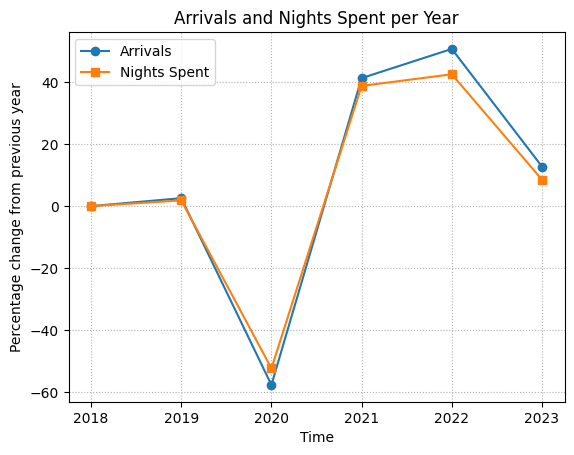

In [886]:
arrivals_change = arrivals['OBS_VALUE'].pct_change() * 100
arrivals_change = arrivals_change.fillna(0)

nights_spent_change = nights_spent['OBS_VALUE'].pct_change() * 100
nights_spent_change = nights_spent_change.fillna(0)

plt.plot(arrivals_change.index, arrivals_change.values, 'o-', label='Arrivals')
plt.plot(nights_spent_change.index, nights_spent_change.values, 's-', label='Nights Spent')

plt.ylabel("Percentage change from previous year")
plt.xlabel("Time")
plt.legend()
plt.title("Arrivals and Nights Spent per Year")
plt.grid(True, linestyle=':')

plt.show()


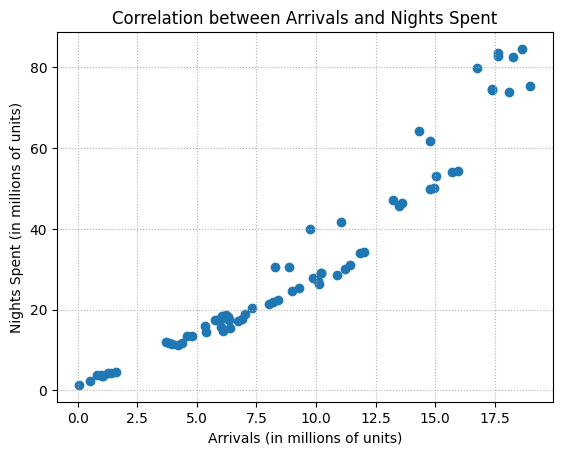

In [887]:
df_month = pd.read_csv('../data/csv/Tipo di località (IT1,122_54_DF_DCSC_TUR_6,1.0).csv')
df_month['OBS_VALUE'] = df_month['OBS_VALUE'] / 1000000
nights_spent_per_month = df_month[(df_month['COUNTRY_RES_GUESTS'] == 'WORLD') & (df_month['TYPE_ACCOMMODATION'] == 'ALL') & (df_month['DATA_TYPE'] == 'NI') & (df_month['TIME_PERIOD'].apply(str).apply(len) > 4) & (df_month['LOCALITY_TYPE'] == 'ALL')]
nights_spent_per_month = nights_spent_per_month[['OBS_VALUE', 'TIME_PERIOD']].set_index('TIME_PERIOD')
arrivals_per_month = df_month[(df_month['COUNTRY_RES_GUESTS'] == 'WORLD') & (df_month['TYPE_ACCOMMODATION'] == 'ALL') & (df_month['DATA_TYPE'] == 'AR') & (df_month['TIME_PERIOD'].apply(str).apply(len) > 4) & (df_month['LOCALITY_TYPE'] == 'ALL')]
arrivals_per_month = arrivals_per_month[['OBS_VALUE', 'TIME_PERIOD']].set_index('TIME_PERIOD')

plt.scatter(arrivals_per_month['OBS_VALUE'], nights_spent_per_month['OBS_VALUE'])

plt.xlabel("Arrivals (in millions of units)")
plt.ylabel("Nights Spent (in millions of units)")
plt.title("Correlation between Arrivals and Nights Spent")
plt.grid(True, linestyle=':')

plt.show()

0.9596950004806546

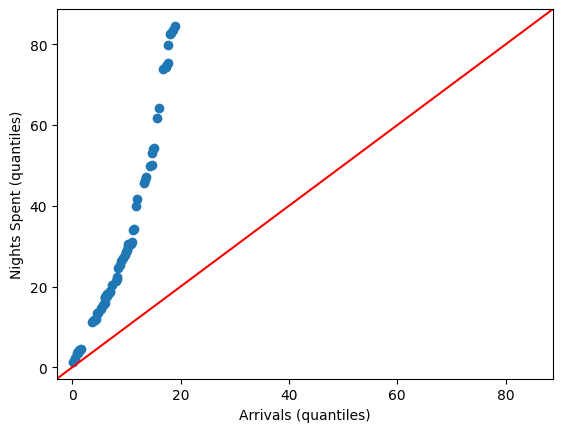

In [888]:
sm.qqplot_2samples(arrivals_per_month['OBS_VALUE'], nights_spent_per_month['OBS_VALUE'], xlabel='Arrivals (quantiles)', ylabel='Nights Spent (quantiles)', line='45')
arrivals_per_month['OBS_VALUE'].corr(nights_spent_per_month['OBS_VALUE'])

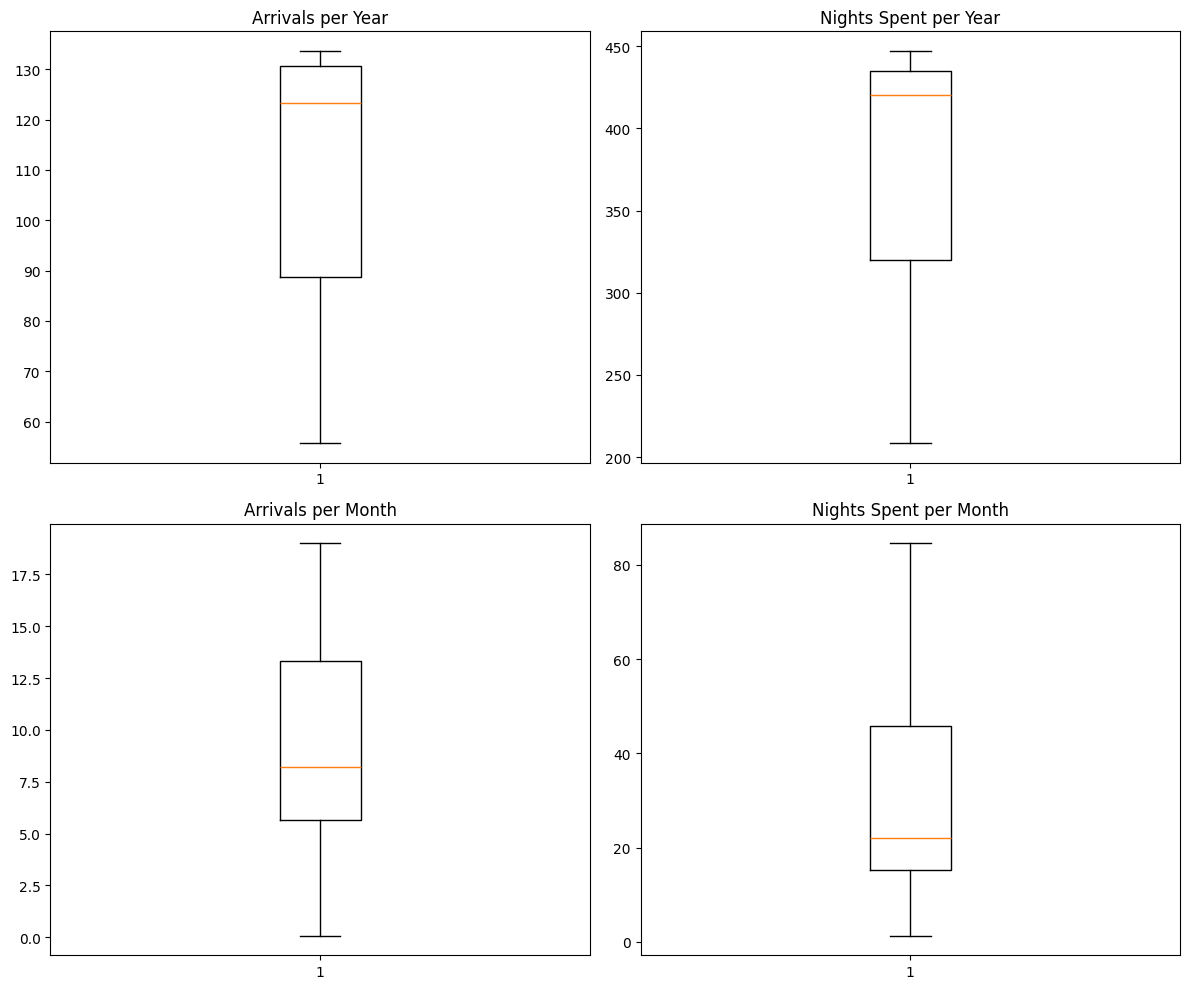

In [889]:
vert = True
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Boxplot for arrivals
axs[0, 0].boxplot(arrivals['OBS_VALUE'], vert=vert)
axs[0, 0].set_title("Arrivals per Year")

# Boxplot for nights spent
axs[0, 1].boxplot(nights_spent['OBS_VALUE'], vert=vert)
axs[0, 1].set_title("Nights Spent per Year")

# Boxplot for arrivals per month
axs[1, 0].boxplot(arrivals_per_month['OBS_VALUE'], vert=vert)
axs[1, 0].set_title("Arrivals per Month")

# Boxplot for nights spent per month
axs[1, 1].boxplot(nights_spent_per_month['OBS_VALUE'], vert=vert)
axs[1, 1].set_title("Nights Spent per Month")

plt.tight_layout()
plt.show()

## ARRIVALS PER YEAR

In [890]:
pre = arrivals[arrivals.index <= 2019]
curr = arrivals[(arrivals.index >= 2020) & (arrivals.index <= 2021)]
post = arrivals[arrivals.index >= 2022]

(0.0, 140.31854445)

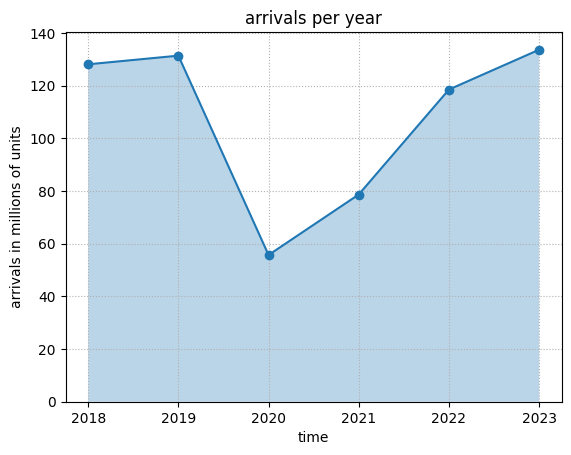

In [891]:
plt.plot(arrivals.index, arrivals['OBS_VALUE'], 'o-')
plt.fill_between(arrivals.index, arrivals['OBS_VALUE'], 0, alpha=0.3)
plt.ylabel("arrivals in millions of units")
plt.xlabel("time")
plt.title("arrivals per year")
plt.grid(True, linestyle=':')
plt.ylim(bottom=0)

(0.0, 137.53343755)

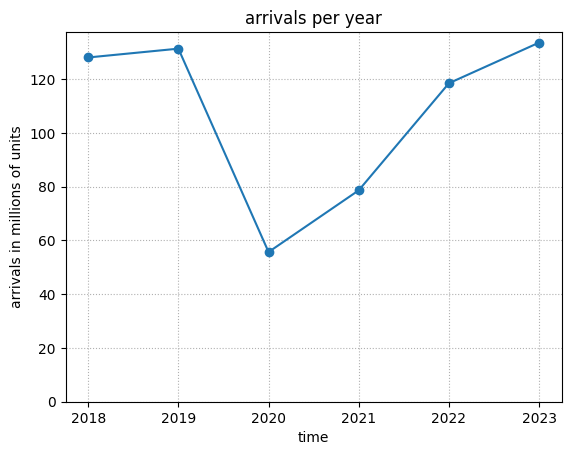

In [892]:
plt.plot(arrivals.index, arrivals['OBS_VALUE'], 'o-')
plt.ylabel("arrivals in millions of units")
plt.xlabel("time")
plt.title("arrivals per year")
plt.grid(True, linestyle=':')
plt.ylim(bottom=0)

(0.0, 137.53343755)

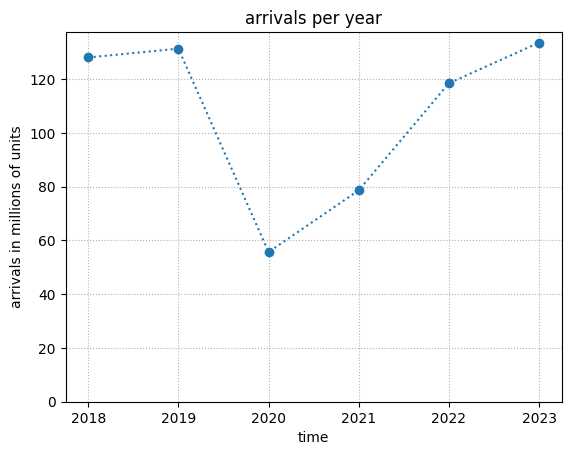

In [893]:
plt.plot(arrivals.index, arrivals['OBS_VALUE'], 'o:')
plt.ylabel("arrivals in millions of units")
plt.xlabel("time")
plt.title("arrivals per year")
plt.grid(True, linestyle=':')
plt.ylim(bottom=0)

(0.0, 140.31854445)

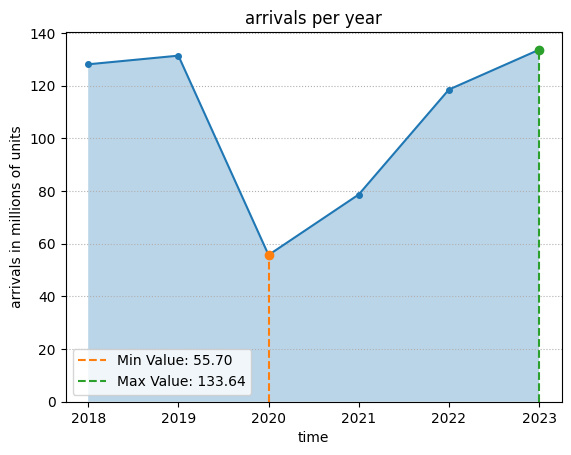

In [894]:
min_v = arrivals[arrivals['OBS_VALUE'] == min(arrivals['OBS_VALUE'])]
max_v = arrivals[arrivals['OBS_VALUE'] == max(arrivals['OBS_VALUE'])]

plt.plot(arrivals.index, arrivals['OBS_VALUE'], 'o-', markersize=4)
plt.fill_between(arrivals.index, arrivals['OBS_VALUE'], 0, alpha=0.3)

plt.vlines(min_v.index, 0, min_v['OBS_VALUE'], linestyles='dashed', color="C1", label=f'Min Value: {min_v["OBS_VALUE"].values[0]:.2f}')
plt.vlines(max_v.index, 0, max_v['OBS_VALUE'], linestyles='dashed', color="C2", label=f'Max Value: {max_v["OBS_VALUE"].values[0]:.2f}')
plt.plot(min_v.index, min_v['OBS_VALUE'], 'o', color="C1")
plt.plot(max_v.index, max_v['OBS_VALUE'], 'o', color="C2")


plt.legend()
plt.ylabel("arrivals in millions of units")
plt.xlabel("time")
plt.title("arrivals per year")
plt.grid(True, axis='y', linestyle=':')
plt.ylim(bottom=0)

(0.0, 140.31854445)

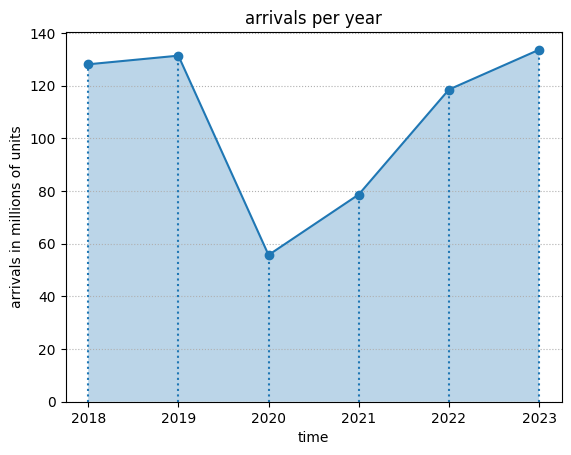

In [895]:
plt.vlines(arrivals.index, 0, arrivals['OBS_VALUE'], linestyles='dotted')
plt.fill_between(arrivals.index, arrivals['OBS_VALUE'], 0, alpha=0.3)
plt.plot(arrivals.index, arrivals['OBS_VALUE'], 'o-')
plt.ylabel("arrivals in millions of units")
plt.xlabel("time")
plt.title("arrivals per year")
plt.grid(True, axis='y', linestyle=':')
plt.ylim(bottom=0)

(0.0, 140.31854445)

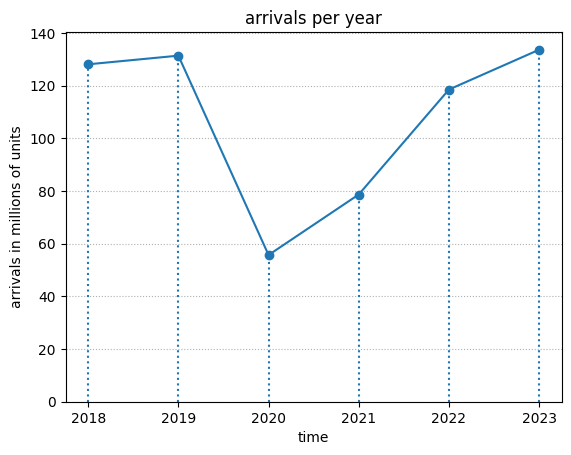

In [896]:
plt.vlines(arrivals.index, 0, arrivals['OBS_VALUE'], linestyles='dotted')
plt.plot(arrivals.index, arrivals['OBS_VALUE'], 'o-')
plt.ylabel("arrivals in millions of units")
plt.xlabel("time")
plt.title("arrivals per year")
plt.grid(True, axis='y', linestyle=':')
plt.ylim(bottom=0)

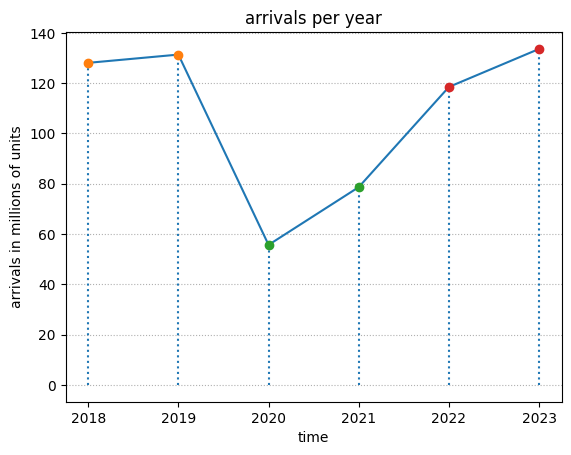

In [897]:
plt.vlines(arrivals.index, 0, arrivals['OBS_VALUE'], linestyles='dotted')
plt.plot(arrivals.index, arrivals['OBS_VALUE'])
plt.plot(pre.index, pre['OBS_VALUE'], 'o')
plt.plot(curr.index, curr['OBS_VALUE'], 'o')
plt.plot(post.index, post['OBS_VALUE'], 'o')
plt.ylabel("arrivals in millions of units")
plt.xlabel("time")
plt.title("arrivals per year")
plt.grid(True, axis='y', linestyle=':')

(0.0, 137.53343755)

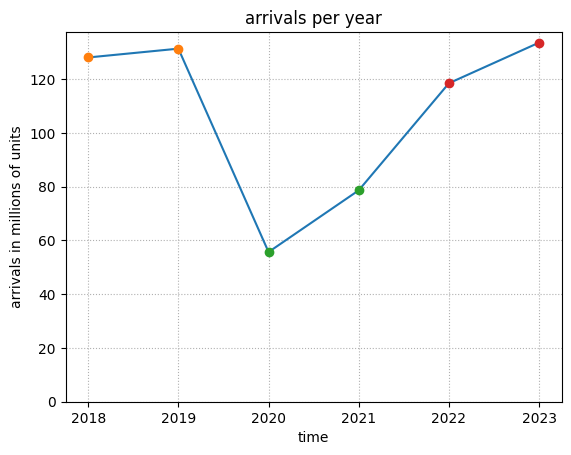

In [898]:
plt.plot(arrivals.index, arrivals['OBS_VALUE'])
plt.plot(pre.index, pre['OBS_VALUE'], 'o')
plt.plot(curr.index, curr['OBS_VALUE'], 'o')
plt.plot(post.index, post['OBS_VALUE'], 'o')
plt.ylabel("arrivals in millions of units")
plt.xlabel("time")
plt.title("arrivals per year")
plt.grid(True, linestyle=':')
plt.ylim(bottom=0)

(0.0, 137.53343755)

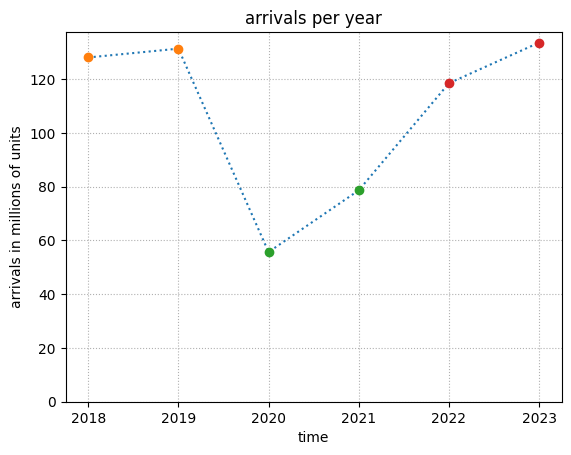

In [899]:
plt.plot(arrivals.index, arrivals['OBS_VALUE'], ':')
plt.plot(pre.index, pre['OBS_VALUE'], 'o')
plt.plot(curr.index, curr['OBS_VALUE'], 'o')
plt.plot(post.index, post['OBS_VALUE'], 'o')
plt.ylabel("arrivals in millions of units")
plt.xlabel("time")
plt.title("arrivals per year")
plt.grid(True, linestyle=':')
plt.ylim(bottom=0)

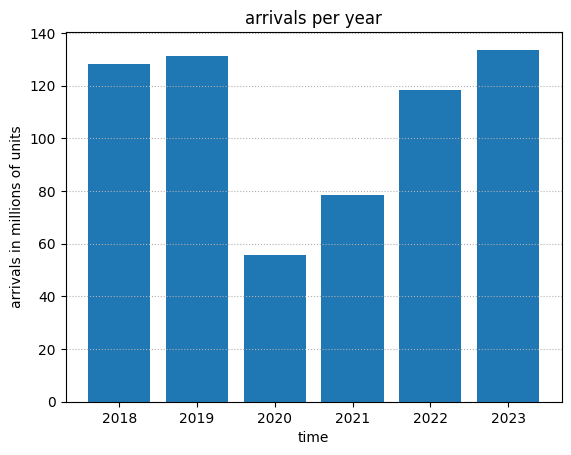

In [900]:
plt.bar(arrivals.index, arrivals['OBS_VALUE'])
plt.ylabel("arrivals in millions of units")
plt.xlabel("time")
plt.title("arrivals per year")
plt.grid(True, axis='y', linestyle=':')

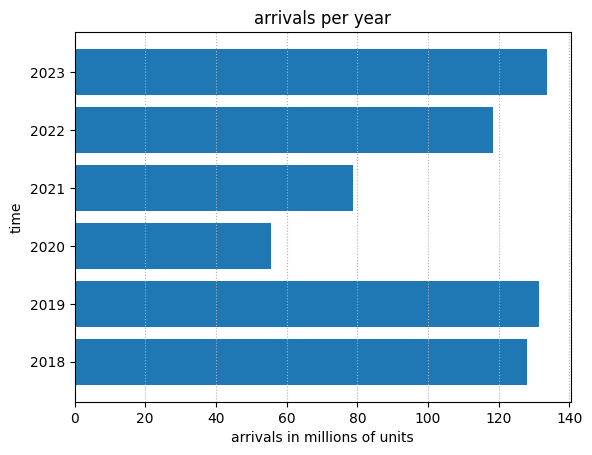

In [901]:
plt.barh(arrivals.index, arrivals['OBS_VALUE'])
plt.xlabel("arrivals in millions of units")
plt.ylabel("time")
plt.title("arrivals per year")
plt.grid(True, axis='x', linestyle=':')

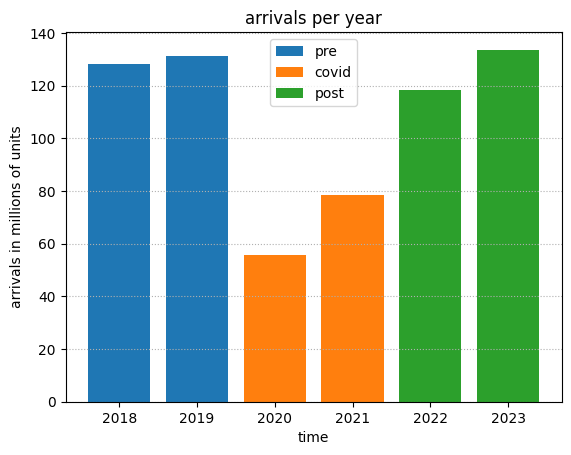

In [902]:
plt.bar(pre.index, pre['OBS_VALUE'], label="pre")
plt.bar(curr.index, curr['OBS_VALUE'], label="covid")
plt.bar(post.index, post['OBS_VALUE'], label="post")
plt.ylabel("arrivals in millions of units")
plt.xlabel("time")
plt.legend()
plt.title("arrivals per year")
plt.grid(True, axis='y', linestyle=':')

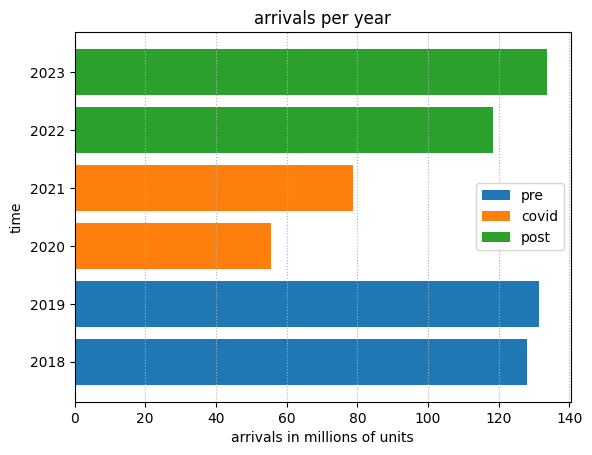

In [903]:
plt.barh(pre.index, pre['OBS_VALUE'], label="pre")
plt.barh(curr.index, curr['OBS_VALUE'], label="covid")
plt.barh(post.index, post['OBS_VALUE'], label="post")
plt.xlabel("arrivals in millions of units")
plt.ylabel("time")
plt.legend()
plt.title("arrivals per year")
plt.grid(True, axis='x', linestyle=':')

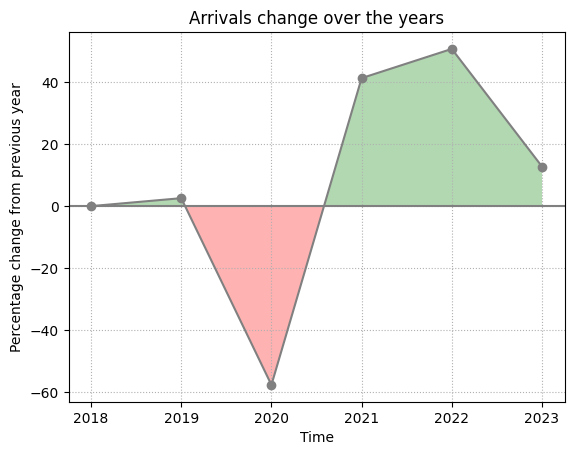

In [904]:
diff = arrivals['OBS_VALUE'].pct_change() * 100
diff = diff.fillna(0)

plt.plot(diff.index, diff.values, 'o-', color="gray")
plt.fill_between(diff.index, 0, diff.values, where=diff.values >= 0, facecolor='green', interpolate=True, alpha=0.3)
plt.fill_between(diff.index, 0, diff.values, where=diff.values < 0, facecolor='red', interpolate=True, alpha=0.3)

plt.axhline(0, color='gray', linestyle='-')
plt.ylabel("Percentage change from previous year")
plt.xlabel("Time")
plt.title("Arrivals change over the years")
plt.grid(True, linestyle=':')

plt.show()


## ARRIVALS PER COUNTRY

In [905]:
arrivals_per_country = df[(df['COUNTRY_RES_GUESTS'] != 'WORLD') & (df['TYPE_ACCOMMODATION'] == 'ALL') & (df['DATA_TYPE'] == 'AR') & (df['TIME_PERIOD'].apply(str).apply(len) <= 4) & (df['LOCALITY_TYPE'] == 'ALL')]
arrivals_it = arrivals_per_country[arrivals_per_country['COUNTRY_RES_GUESTS'] == 'IT'].set_index('TIME_PERIOD')
arrivals_extra_it = arrivals_per_country[arrivals_per_country['COUNTRY_RES_GUESTS'] != 'IT'].set_index('TIME_PERIOD')

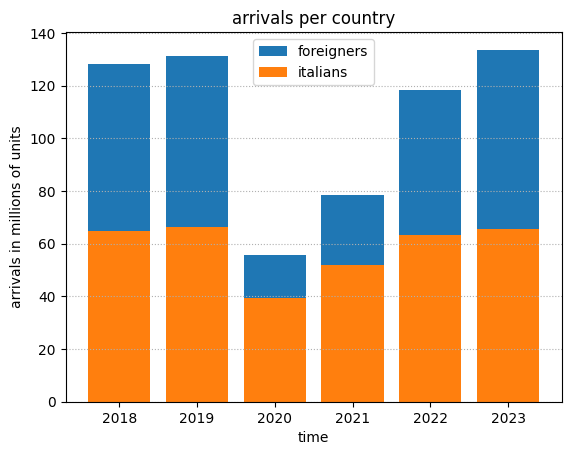

In [906]:
plt.bar(arrivals_extra_it.index, arrivals_extra_it['OBS_VALUE'] + arrivals_it['OBS_VALUE'], label="foreigners")
plt.bar(arrivals_it.index, arrivals_it['OBS_VALUE'], label="italians")
plt.ylabel("arrivals in millions of units")
plt.xlabel("time")
plt.legend()
plt.title("arrivals per country")
plt.grid(True, axis='y', linestyle=':')

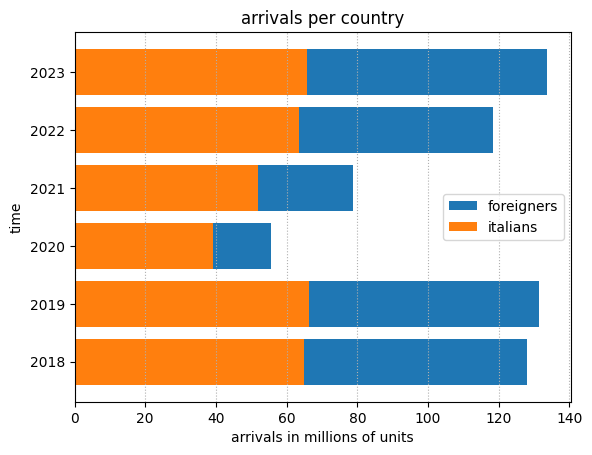

In [907]:
plt.barh(arrivals_extra_it.index, arrivals_extra_it['OBS_VALUE'] + arrivals_it['OBS_VALUE'], label="foreigners")
plt.barh(arrivals_it.index, arrivals_it['OBS_VALUE'], label="italians")
plt.xlabel("arrivals in millions of units")
plt.ylabel("time")
plt.legend()
plt.title("arrivals per country")
plt.grid(True, axis='x', linestyle=':')

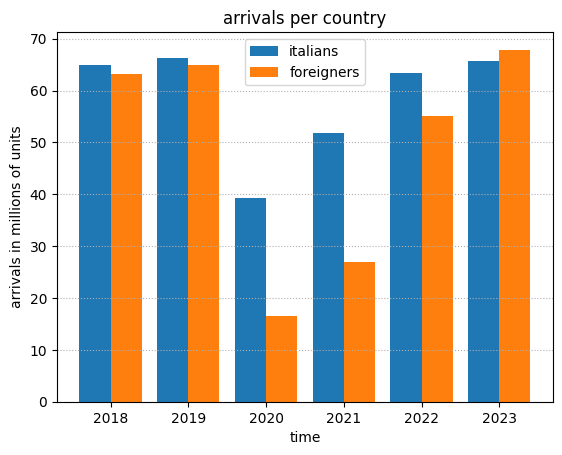

In [908]:
width = 0.4  # the width of the bars

fig, ax = plt.subplots()

# Plotting the bars
bars1 = ax.bar(arrivals_it.index - width/2, arrivals_it['OBS_VALUE'], width, label='italians')
bars2 = ax.bar(arrivals_extra_it.index + width/2, arrivals_extra_it['OBS_VALUE'], width, label='foreigners')

# Adding labels and title
ax.set_ylabel("arrivals in millions of units")
ax.set_xlabel("time")
ax.legend()
ax.set_title("arrivals per country")
ax.grid(True, axis='y', linestyle=':')
plt.show()

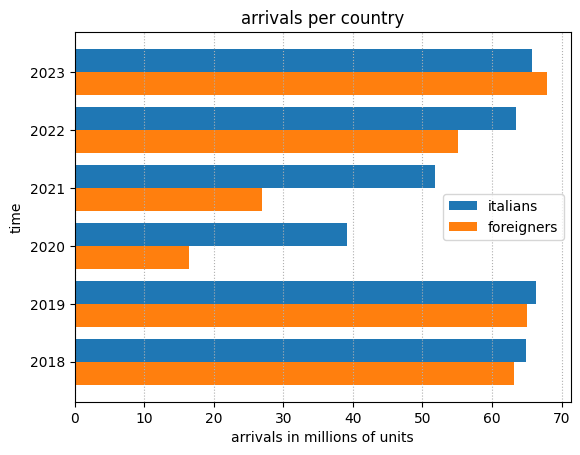

In [909]:
width = 0.4  # the width of the bars

# Plotting the bars
bars1 = plt.barh(arrivals_it.index + width/2, arrivals_it['OBS_VALUE'], width, label='italians')
bars2 = plt.barh(arrivals_extra_it.index - width/2, arrivals_extra_it['OBS_VALUE'], width, label='foreigners')

# Adding labels and title
plt.xlabel("arrivals in millions of units")
plt.ylabel("time")
plt.legend()
plt.title("arrivals per country")
plt.grid(True, axis='x', linestyle=':')
plt.show()

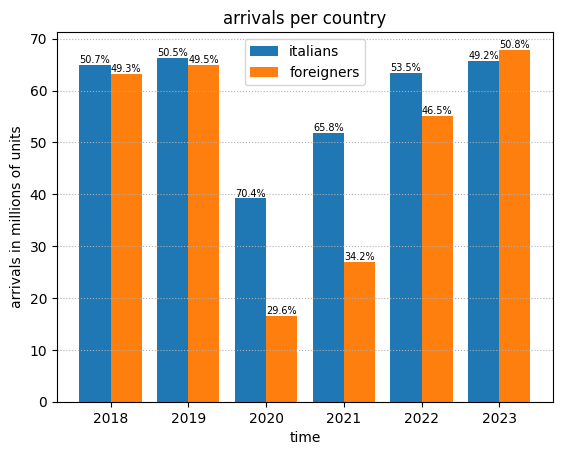

In [910]:
width = 0.4  # the width of the bars

fig, ax = plt.subplots()

# Plotting the bars
bars1 = ax.bar(arrivals_it.index - width/2, arrivals_it['OBS_VALUE'], width, label='italians')
bars2 = ax.bar(arrivals_extra_it.index + width/2, arrivals_extra_it['OBS_VALUE'], width, label='foreigners')

# Adding labels and title
ax.set_ylabel("arrivals in millions of units")
ax.set_xlabel("time")
ax.legend()
ax.set_title("arrivals per country")
ax.grid(True, axis='y', linestyle=':')

# Adding percentages on top of each bar
total_arrivals = arrivals_it['OBS_VALUE'].reindex(arrivals_it.index).fillna(0) + arrivals_extra_it['OBS_VALUE'].reindex(arrivals_it.index).fillna(0)
for bar in bars1:
  height = bar.get_height()
  percentage = height / total_arrivals.loc[round(bar.get_x() + width/2)] * 100
  ax.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=7)

for bar in bars2:
  height = bar.get_height()
  percentage = height / total_arrivals.loc[round(bar.get_x() - width/2)] * 100
  ax.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=7)

plt.show()

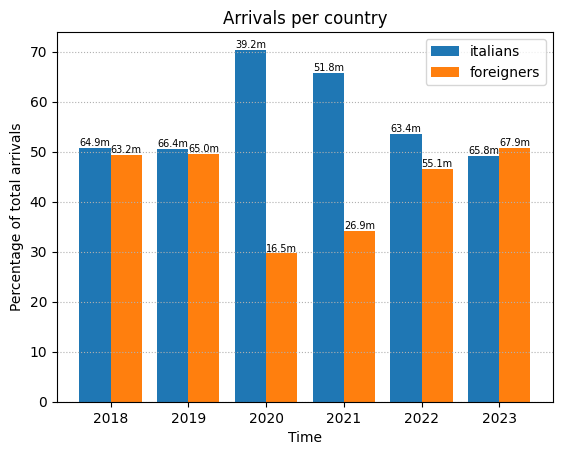

In [911]:
width = 0.4  # the width of the bars

fig, ax = plt.subplots()

# Calculate percentages
total_arrivals = arrivals_it['OBS_VALUE'].reindex(arrivals_it.index).fillna(0) + arrivals_extra_it['OBS_VALUE'].reindex(arrivals_it.index).fillna(0)
percentages_hotel = arrivals_it['OBS_VALUE'] / total_arrivals * 100
percentages_other = arrivals_extra_it['OBS_VALUE'] / total_arrivals * 100

# Plotting the bars
bars1 = ax.bar(arrivals_it.index - width/2, percentages_hotel, width, label='italians')
bars2 = ax.bar(arrivals_extra_it.index + width/2, percentages_other, width, label='foreigners')

# Adding labels and title
ax.set_ylabel("Percentage of total arrivals")
ax.set_xlabel("Time")
ax.legend()
ax.set_title("Arrivals per country")
ax.grid(True, axis='y', linestyle=':')

# Adding percentages and absolute values on top of each bar
for bar in bars1:
  height = bar.get_height()
  absolute_value = arrivals_it.loc[round(bar.get_x() + width/2), 'OBS_VALUE']
  ax.text(bar.get_x() + bar.get_width() / 2, height, f'{absolute_value:.1f}m', ha='center', va='bottom', fontsize=7)

for bar in bars2:
  height = bar.get_height()
  absolute_value = arrivals_extra_it.loc[round(bar.get_x() - width/2), 'OBS_VALUE']
  ax.text(bar.get_x() + bar.get_width() / 2, height, f'{absolute_value:.1f}m', ha='center', va='bottom', fontsize=7)

plt.show()

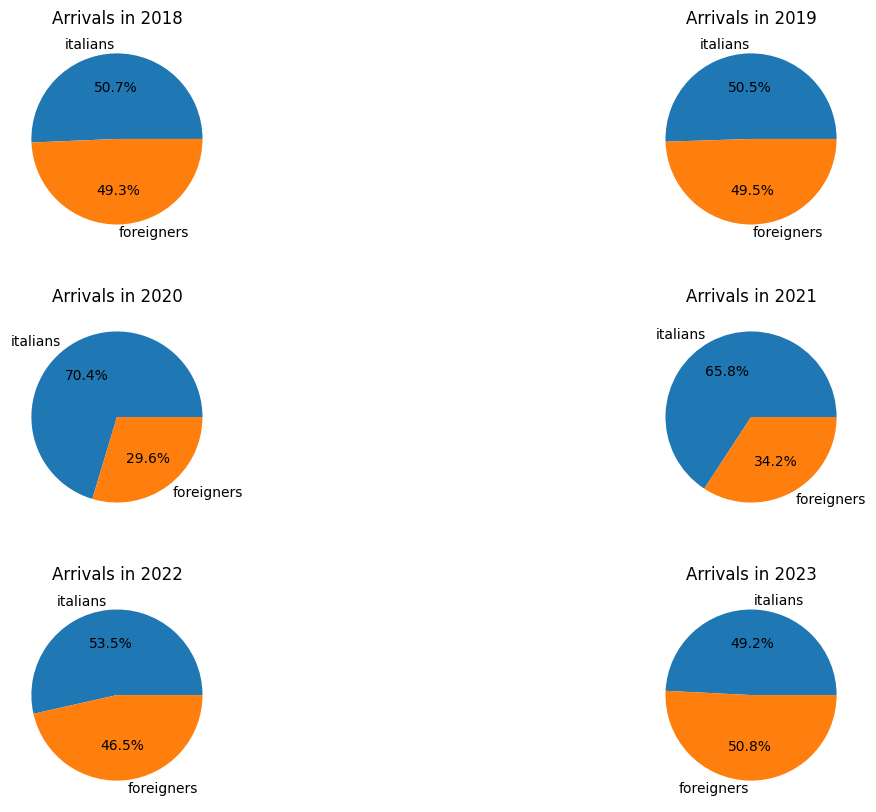

In [912]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

years = arrivals.index
for i, year in enumerate(years):
  it_value = arrivals_it.loc[year, 'OBS_VALUE']
  other_value = arrivals_extra_it.loc[year, 'OBS_VALUE']
  ax = axs[i // 2, i % 2]
  ax.pie([it_value, other_value], labels=['italians', 'foreigners'], autopct='%1.1f%%')
  ax.set_title(f'Arrivals in {year}')

plt.subplots_adjust(hspace=0.3)
plt.show()

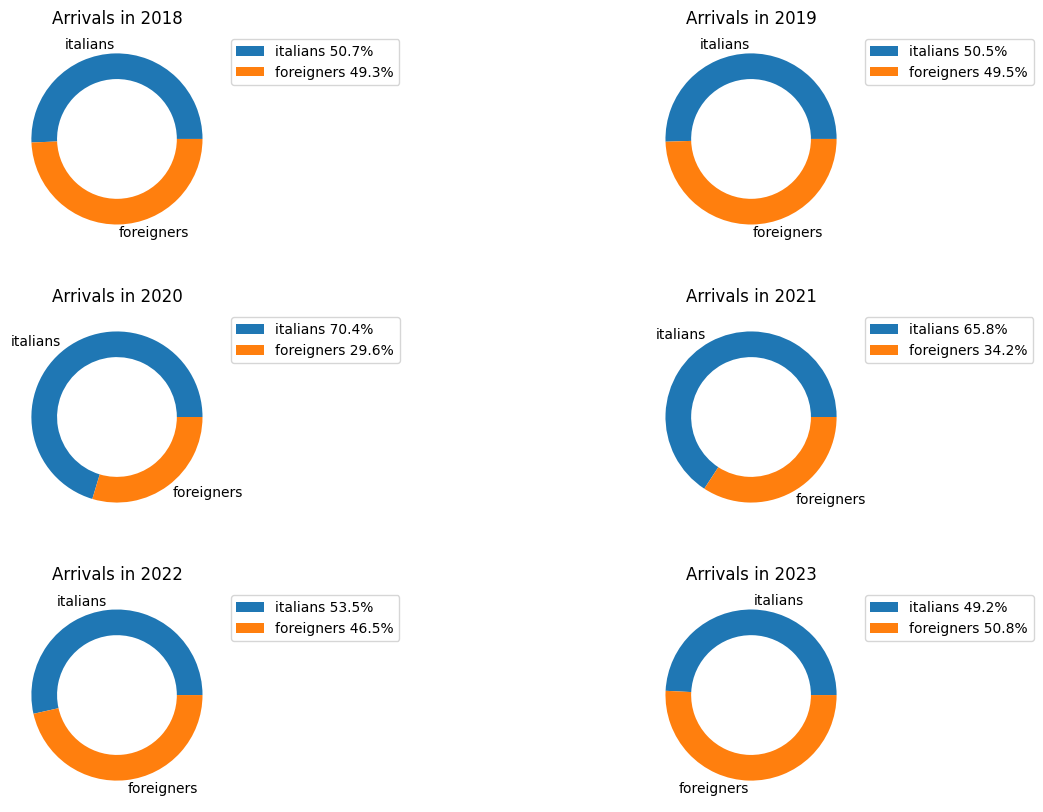

In [913]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

years = arrivals.index
for i, year in enumerate(years):
  italians_value = arrivals_it.loc[year, 'OBS_VALUE']
  other_value = arrivals_extra_it.loc[year, 'OBS_VALUE']
  ax = axs[i // 2, i % 2]
  wedges, texts = ax.pie(
    [italians_value, other_value], 
    labels=['italians', 'foreigners'], 
    wedgeprops=dict(width=0.3)
  )
  italians_perc = italians_value / (italians_value + other_value) * 100
  other_perc = other_value / (italians_value + other_value) * 100
  ax.legend(wedges, [f'italians {italians_perc:.1f}%', f'foreigners {other_perc:.1f}%'], bbox_to_anchor=(1,1))
  ax.set_title(f'Arrivals in {year}')

plt.subplots_adjust(hspace=0.3)
plt.show()

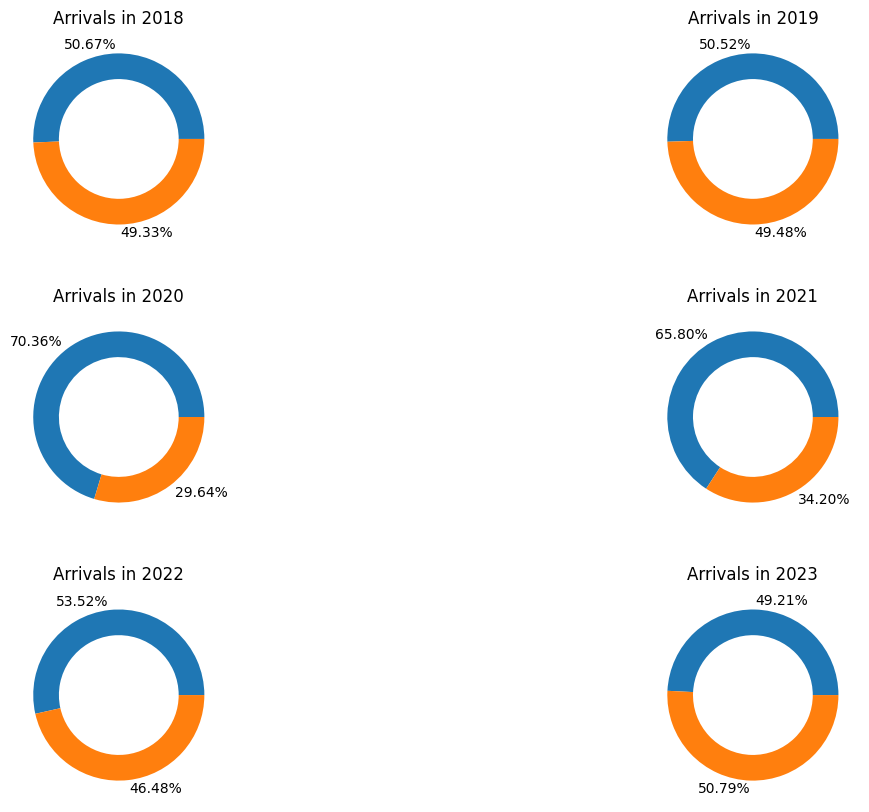

In [914]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

years = arrivals.index
for i, year in enumerate(years):
  italians_value = arrivals_it.loc[year, 'OBS_VALUE']
  other_value = arrivals_extra_it.loc[year, 'OBS_VALUE']
  italians_perc = italians_value / (italians_value + other_value) * 100
  other_perc = other_value / (italians_value + other_value) * 100
  ax = axs[i // 2, i % 2]
  wedges, texts = ax.pie(
    [italians_value, other_value], 
    labels=[f'{italians_perc:.2f}%', f'{other_perc:.2f}%'], 
    wedgeprops=dict(width=0.3)
  )
  ax.set_title(f'Arrivals in {year}')

plt.subplots_adjust(hspace=0.3)
plt.show()

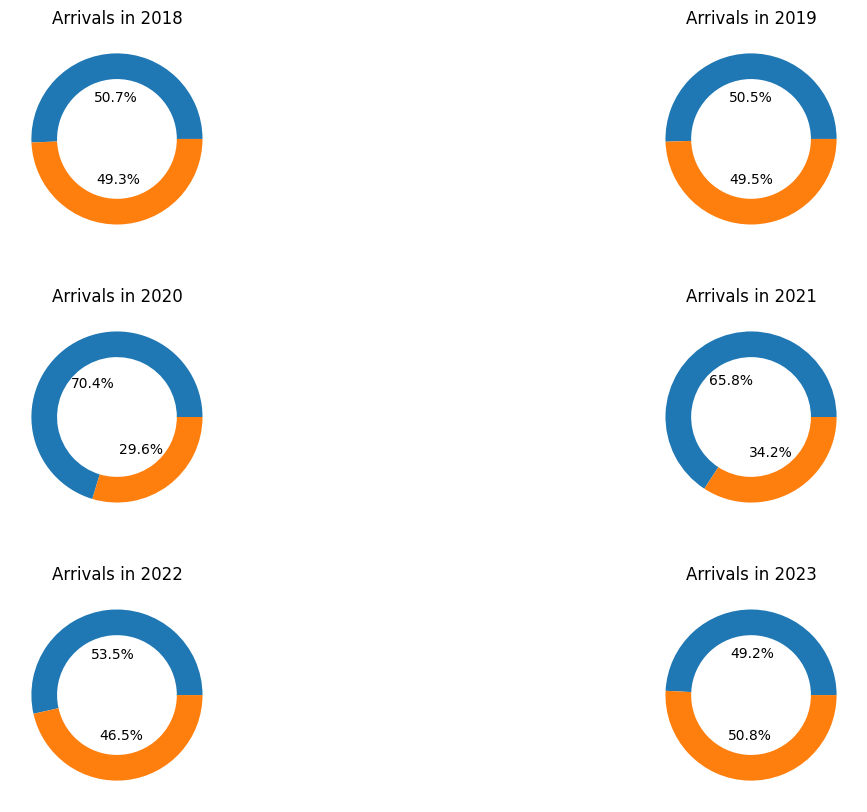

In [915]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

years = arrivals.index
for i, year in enumerate(years):
  italians_value = arrivals_it.loc[year, 'OBS_VALUE']
  other_value = arrivals_extra_it.loc[year, 'OBS_VALUE']
  italians_perc = italians_value / (italians_value + other_value) * 100
  other_perc = other_value / (italians_value + other_value) * 100
  ax = axs[i // 2, i % 2]
  wedges, texts, autotexts = ax.pie(
    [italians_value, other_value], 
    wedgeprops=dict(width=0.3),
    autopct=lambda pct: f'{pct:.1f}%', 
    pctdistance=0.48  # Adjust this value to move the text closer to the center
  )
  ax.set_title(f'Arrivals in {year}')

plt.subplots_adjust(hspace=0.3)
plt.show()

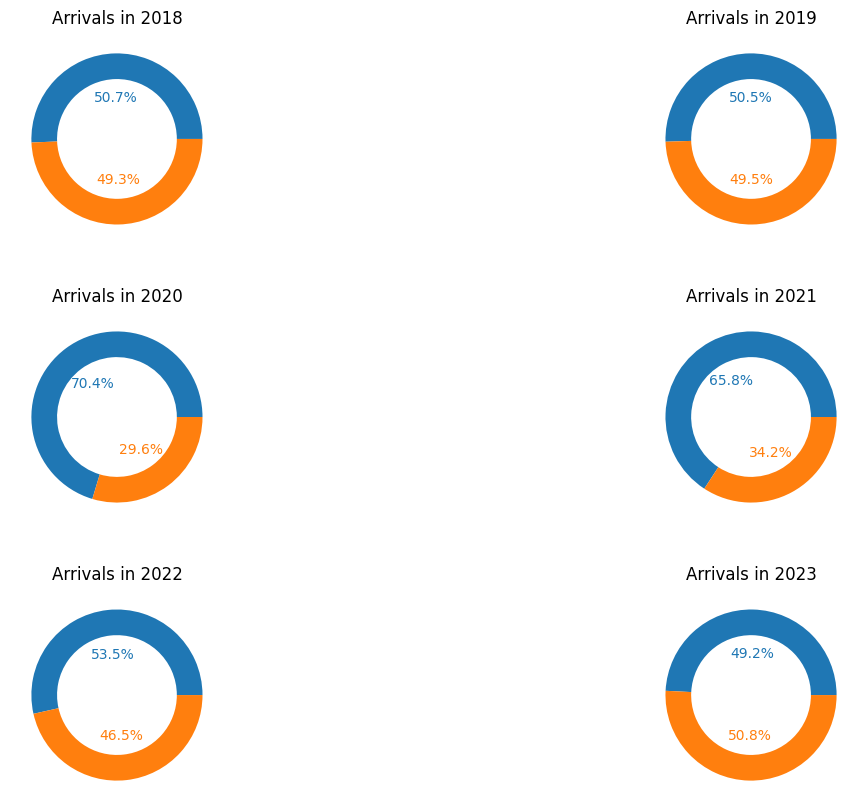

In [916]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

years = arrivals.index
for i, year in enumerate(years):
  italians_value = arrivals_it.loc[year, 'OBS_VALUE']
  other_value = arrivals_extra_it.loc[year, 'OBS_VALUE']
  italians_perc = italians_value / (italians_value + other_value) * 100
  other_perc = other_value / (italians_value + other_value) * 100
  ax = axs[i // 2, i % 2]
  wedges, texts, autotexts = ax.pie(
    [italians_value, other_value], 
    wedgeprops=dict(width=0.3),
    autopct=lambda pct: f'{pct:.1f}%', 
    pctdistance=0.48  # Adjust this value to move the text closer to the center
  )
  for i, autotext in enumerate(autotexts):
    autotext.set_color('C0' if i == 0 else 'C1')
  ax.set_title(f'Arrivals in {year}')

plt.subplots_adjust(hspace=0.3)
plt.show()

## ARRIVALS PER ACCOMODATION

In [917]:
arrivals_per_accommodation = df[(df['COUNTRY_RES_GUESTS'] == 'WORLD') & (df['TYPE_ACCOMMODATION'] != 'ALL') & (df['DATA_TYPE'] == 'AR') & (df['TIME_PERIOD'].apply(str).apply(len) <= 4) & (df['LOCALITY_TYPE'] == 'ALL')]
arrivals_hotel = arrivals_per_accommodation[arrivals_per_accommodation['TYPE_ACCOMMODATION'] == 'HOTELLIKE'].set_index('TIME_PERIOD')
arrivals_extra_hotel = arrivals_per_accommodation[arrivals_per_accommodation['TYPE_ACCOMMODATION'] != 'HOTELLIKE'].set_index('TIME_PERIOD')

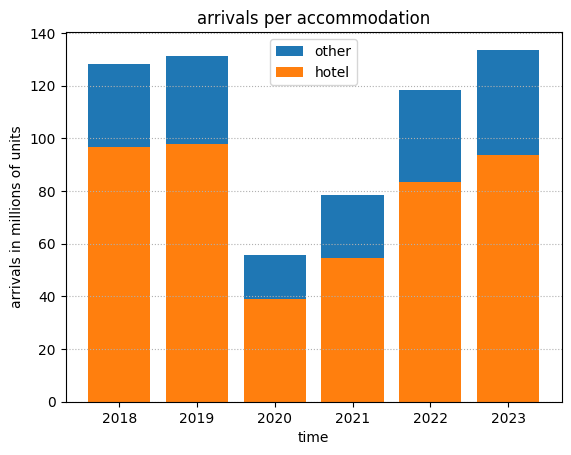

In [918]:
plt.bar(arrivals_extra_hotel.index, arrivals_extra_hotel['OBS_VALUE'] + arrivals_hotel['OBS_VALUE'], label="other")
plt.bar(arrivals_hotel.index, arrivals_hotel['OBS_VALUE'], label="hotel")
plt.ylabel("arrivals in millions of units")
plt.xlabel("time")
plt.legend()
plt.title("arrivals per accommodation")
plt.grid(True, axis='y', linestyle=':')

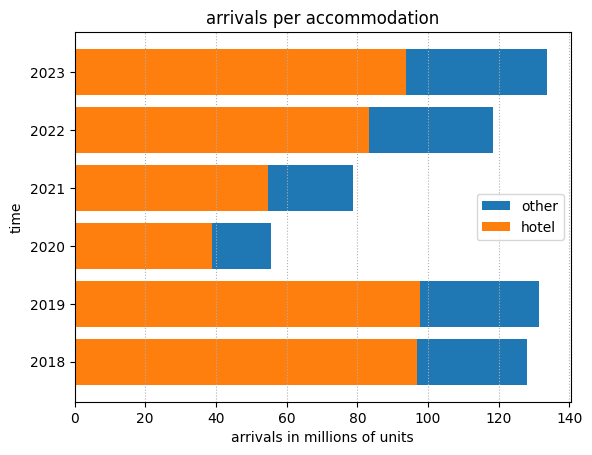

In [919]:
plt.barh(arrivals_extra_hotel.index, arrivals_extra_hotel['OBS_VALUE'] + arrivals_hotel['OBS_VALUE'], label="other")
plt.barh(arrivals_hotel.index, arrivals_hotel['OBS_VALUE'], label="hotel")
plt.xlabel("arrivals in millions of units")
plt.ylabel("time")
plt.legend()
plt.title("arrivals per accommodation")
plt.grid(True, axis='x', linestyle=':')

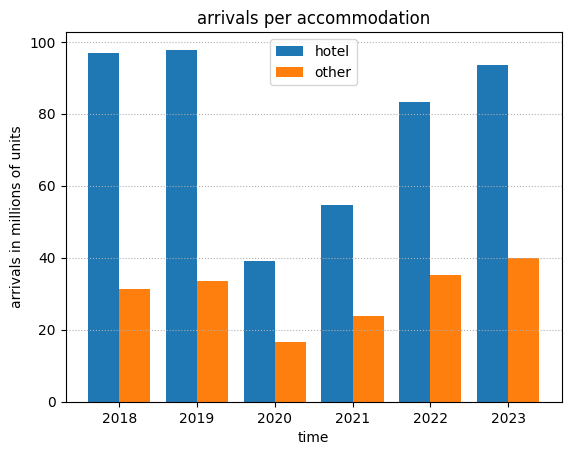

In [920]:
width = 0.4  # the width of the bars

plt.bar(arrivals_hotel.index - width/2, arrivals_hotel['OBS_VALUE'], width, label='hotel')
plt.bar(arrivals_extra_hotel.index + width/2, arrivals_extra_hotel['OBS_VALUE'], width, label='other')

# Adding labels and title
plt.ylabel("arrivals in millions of units")
plt.xlabel("time")
plt.legend()
plt.title("arrivals per accommodation")
plt.grid(True, axis='y', linestyle=':')

plt.show()

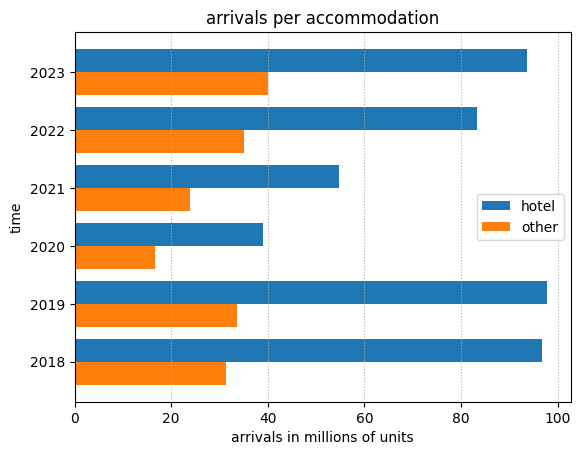

In [921]:
width = 0.4  # the width of the bars

plt.barh(arrivals_hotel.index + width/2, arrivals_hotel['OBS_VALUE'], width, label='hotel')
plt.barh(arrivals_extra_hotel.index - width/2, arrivals_extra_hotel['OBS_VALUE'], width, label='other')

# Adding labels and title
plt.xlabel("arrivals in millions of units")
plt.ylabel("time")
plt.legend()
plt.title("arrivals per accommodation")
plt.grid(True, axis='x', linestyle=':')

plt.show()

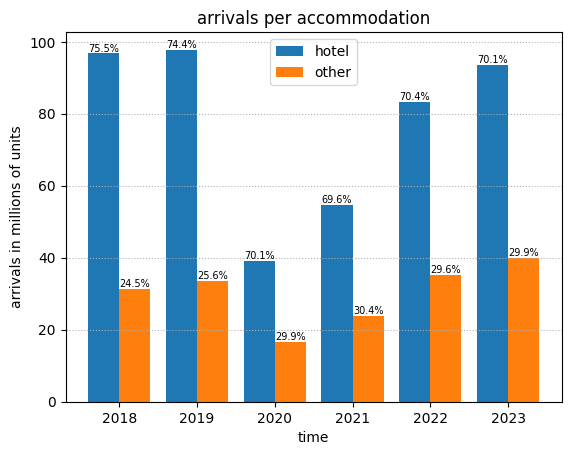

In [922]:
width = 0.4  # the width of the bars

fig, ax = plt.subplots()

# Plotting the bars
bars1 = ax.bar(arrivals_hotel.index - width/2, arrivals_hotel['OBS_VALUE'], width, label='hotel')
bars2 = ax.bar(arrivals_extra_hotel.index + width/2, arrivals_extra_hotel['OBS_VALUE'], width, label='other')

# Adding labels and title
ax.set_ylabel("arrivals in millions of units")
ax.set_xlabel("time")
ax.legend()
ax.set_title("arrivals per accommodation")
ax.grid(True, axis='y', linestyle=':')

# Adding percentages on top of each bar
total_arrivals = arrivals_hotel['OBS_VALUE'].reindex(arrivals_hotel.index).fillna(0) + arrivals_extra_hotel['OBS_VALUE'].reindex(arrivals_hotel.index).fillna(0)
for bar in bars1:
  height = bar.get_height()
  percentage = height / total_arrivals.loc[round(bar.get_x() + width/2)] * 100
  ax.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=7)

for bar in bars2:
  height = bar.get_height()
  percentage = height / total_arrivals.loc[round(bar.get_x() - width/2)] * 100
  ax.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=7)

plt.show()

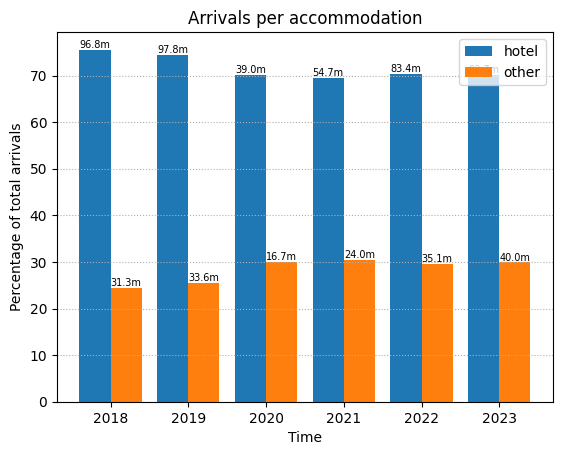

In [923]:
width = 0.4  # the width of the bars

fig, ax = plt.subplots()

# Calculate percentages
total_arrivals = arrivals_hotel['OBS_VALUE'].reindex(arrivals_hotel.index).fillna(0) + arrivals_extra_hotel['OBS_VALUE'].reindex(arrivals_hotel.index).fillna(0)
percentages_hotel = arrivals_hotel['OBS_VALUE'] / total_arrivals * 100
percentages_other = arrivals_extra_hotel['OBS_VALUE'] / total_arrivals * 100

# Plotting the bars
bars1 = ax.bar(arrivals_hotel.index - width/2, percentages_hotel, width, label='hotel')
bars2 = ax.bar(arrivals_extra_hotel.index + width/2, percentages_other, width, label='other')

# Adding labels and title
ax.set_ylabel("Percentage of total arrivals")
ax.set_xlabel("Time")
ax.legend()
ax.set_title("Arrivals per accommodation")
ax.grid(True, axis='y', linestyle=':')

# Adding percentages and absolute values on top of each bar
for bar in bars1:
  height = bar.get_height()
  absolute_value = arrivals_hotel.loc[round(bar.get_x() + width/2), 'OBS_VALUE']
  ax.text(bar.get_x() + bar.get_width() / 2, height, f'{absolute_value:.1f}m', ha='center', va='bottom', fontsize=7)

for bar in bars2:
  height = bar.get_height()
  absolute_value = arrivals_extra_hotel.loc[round(bar.get_x() - width/2), 'OBS_VALUE']
  ax.text(bar.get_x() + bar.get_width() / 2, height, f'{absolute_value:.1f}m', ha='center', va='bottom', fontsize=7)

plt.show()


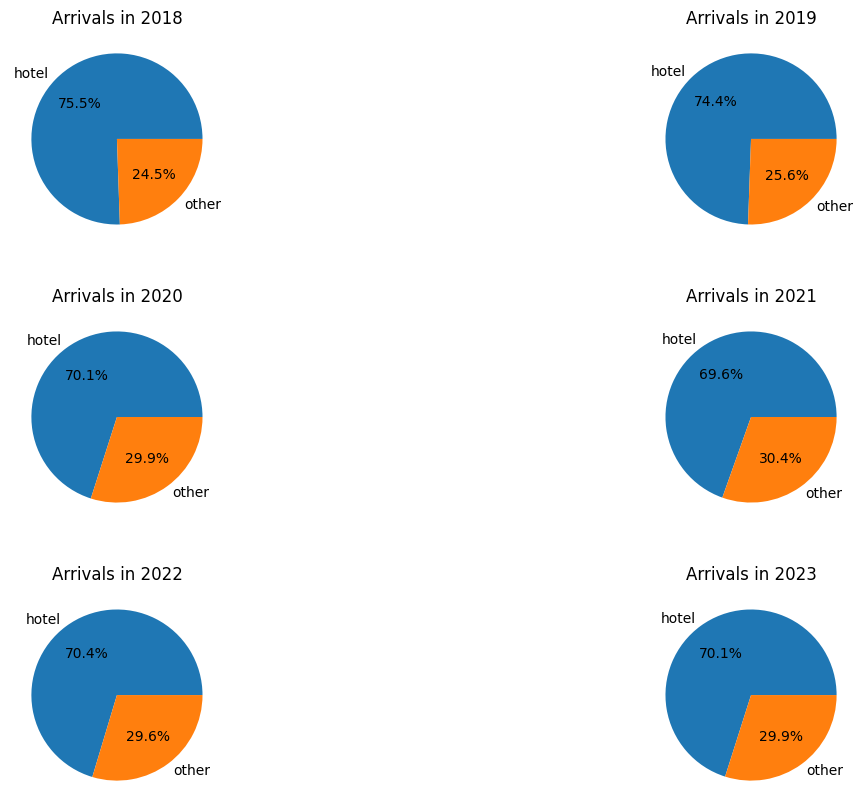

In [924]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

years = arrivals.index
for i, year in enumerate(years):
  hotel_value = arrivals_hotel.loc[year, 'OBS_VALUE']
  other_value = arrivals_extra_hotel.loc[year, 'OBS_VALUE']
  ax = axs[i // 2, i % 2]
  ax.pie([hotel_value, other_value], labels=['hotel', 'other'], autopct='%1.1f%%')
  ax.set_title(f'Arrivals in {year}')

plt.subplots_adjust(hspace=0.3)
plt.show()

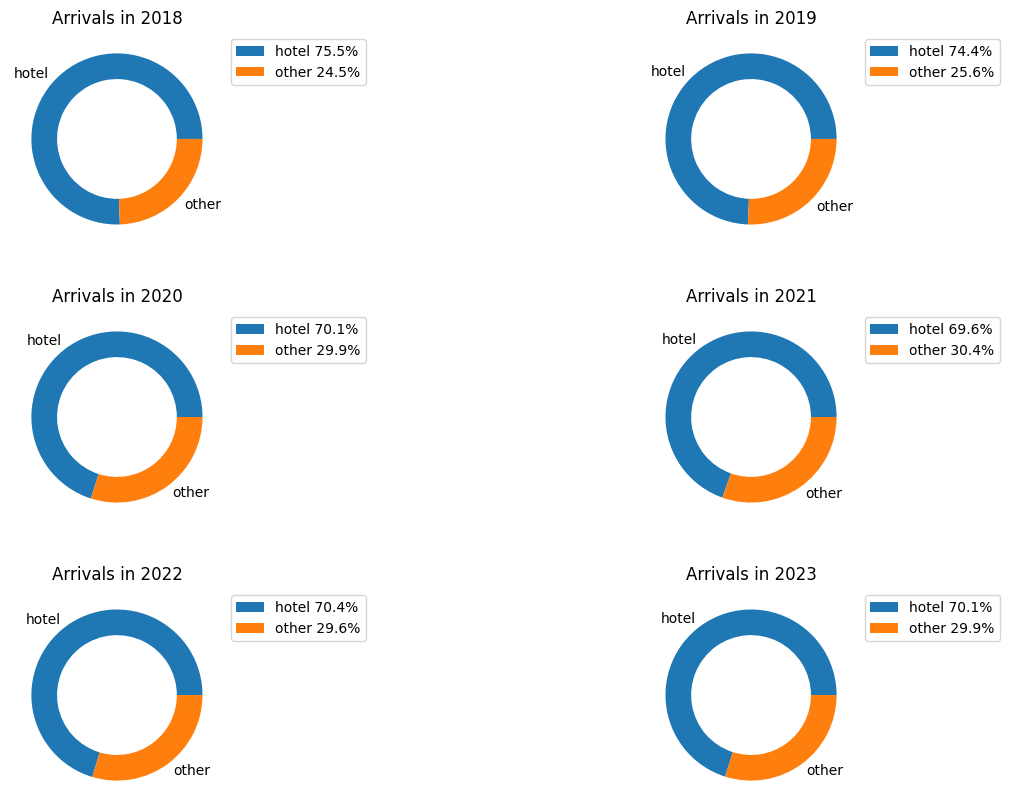

In [925]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

years = arrivals.index
for i, year in enumerate(years):
  hotel_value = arrivals_hotel.loc[year, 'OBS_VALUE']
  other_value = arrivals_extra_hotel.loc[year, 'OBS_VALUE']
  ax = axs[i // 2, i % 2]
  wedges, texts = ax.pie(
    [hotel_value, other_value], 
    labels=['hotel', 'other'], 
    wedgeprops=dict(width=0.3)
  )
  hotel_perc = hotel_value / (hotel_value + other_value) * 100
  other_perc = other_value / (hotel_value + other_value) * 100
  ax.legend(wedges, [f'hotel {hotel_perc:.1f}%', f'other {other_perc:.1f}%'], bbox_to_anchor=(1,1))
  ax.set_title(f'Arrivals in {year}')

plt.subplots_adjust(hspace=0.3)
plt.show()

## ARRIVALS PER LOCALITY TYPE (not available between 2018 and 2022)

In [926]:
df = pd.read_csv('../data/csv/Tipo di località e paese di residenza - Annuale (DCSC_TUR_09122024162620335).csv')
df['Value'] = df['Value'] / 1000000
df.head()

ITTER107 Territorio TIPO_DATO7 Indicatori CORREZ   Correzione  \
0       IT     Italia         AR    arrivi       N  dati grezzi   
1       IT     Italia         AR    arrivi       N  dati grezzi   
2       IT     Italia         AR    arrivi       N  dati grezzi   
3       IT     Italia         AR    arrivi       N  dati grezzi   
4       IT     Italia         AR    arrivi       N  dati grezzi   

  TIPO_ALLOGGIO2     Tipologia di esercizio ATECO_2007  \
0            ALL  totale esercizi ricettivi    551_553   
1            ALL  totale esercizi ricettivi    551_553   
2            ALL  totale esercizi ricettivi    551_553   
3            ALL  totale esercizi ricettivi    551_553   
4            ALL  totale esercizi ricettivi    551_553   

                                          Ateco 2007 ISO  \
0  alberghi e strutture simili, alloggi per vacan...  IT   
1  alberghi e strutture simili, alloggi per vacan...  IT   
2  alberghi e strutture simili, alloggi per vacan...  IT   
3  alberghi e strutture simili, alloggi per vacan...  IT   
4  alberghi e strutture simili, alloggi per vacan...  IT   

  Paese di residenza dei clienti TIPOITTER1A Tipo di località     TIME  \
0                         Italia         ALL    tutte le voci     2017   
1                         Italia         ALL    tutte le voci  2017-01   
2                         Italia         ALL    tutte le voci  2017-02   
3                         Italia         ALL    tutte le voci  2017-03   
4                         Italia         ALL    tutte le voci  2017-04   

  Seleziona periodo      Value  Flag Codes  Flags  
0              2017  62.672366         NaN    NaN  
1          Gen-2017   3.423428         NaN    NaN  
2          Feb-2017   3.419167         NaN    NaN  
3          Mar-2017   3.950267         NaN    NaN  
4          Apr-2017   5.463305         NaN    NaN

In [927]:
arrivals_per_locality = df[(df['ISO'] == 'WORLD') & (df['TIPO_ALLOGGIO2'] == 'ALL') & (df['TIPO_DATO7'] == 'AR') & (df['TIME'].apply(str).apply(len) <= 4) & (df['TIPOITTER1A'] != 'ALL') & (df['TIPOITTER1A'] != 'TOUR') & (df['TIPOITTER1A'] != 'CPROV_MUN')]
localities = arrivals_per_locality['TIPOITTER1A'].unique()
localities

array(['TOUR_HIST_ART', 'TOUR_MOUNT', 'TOUR_LACSTR', 'TOUR_SEASD',
       'TOUR_THRM', 'TOUR_HILL', 'CPROV', 'MUN'], dtype=object)

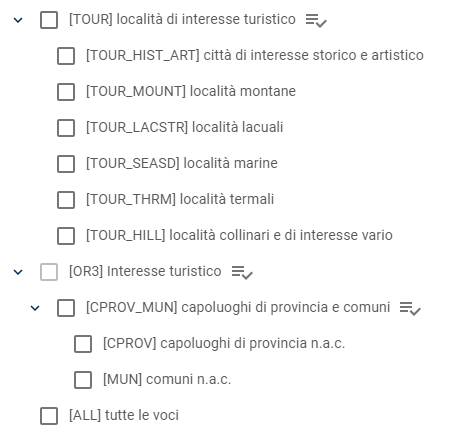

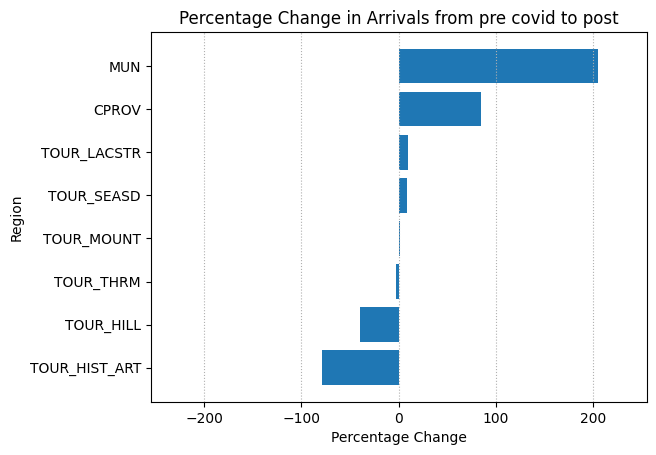

In [928]:
# Calculate the total arrivals for 2018+2019 and 2022+2023 for each region
arrivals_pre = arrivals_per_locality[arrivals_per_locality['TIME'].isin(['2017'])].groupby('TIPOITTER1A')['Value'].sum()
arrivals_post = arrivals_per_locality[arrivals_per_locality['TIME'].isin(['2023'])].groupby('TIPOITTER1A')['Value'].sum()

# Calculate the percentage change
percentage_change = ((arrivals_post - arrivals_pre) / arrivals_pre * 100).sort_values()

# Plot the percentage change
plt.barh(percentage_change.index, percentage_change.values, color='C0')

plt.xlabel("Percentage Change")
plt.ylabel("Region")
plt.title("Percentage Change in Arrivals from pre covid to post")
plt.grid(True, axis='x', linestyle=':')

max_change = percentage_change.abs().max()
plt.xlim(-max_change - 50, max_change + 50)  # Adjust x-axis limits for even spacing
plt.show()

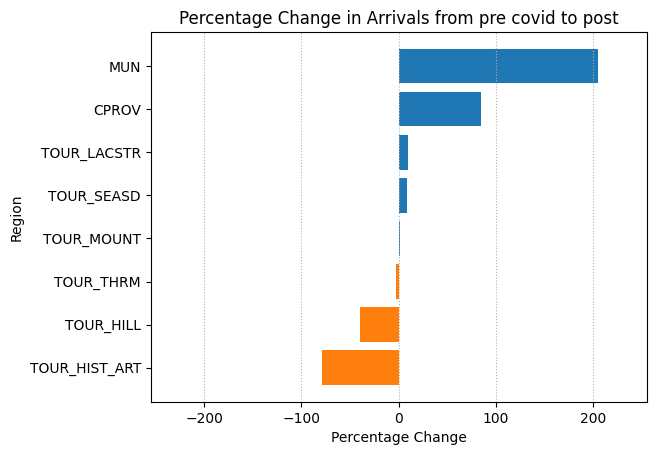

In [929]:
# Calculate the total arrivals for 2018+2019 and 2022+2023 for each region
arrivals_pre = arrivals_per_locality[arrivals_per_locality['TIME'].isin(['2017'])].groupby('TIPOITTER1A')['Value'].sum()
arrivals_post = arrivals_per_locality[arrivals_per_locality['TIME'].isin(['2023'])].groupby('TIPOITTER1A')['Value'].sum()

# Calculate the percentage change
percentage_change = ((arrivals_post - arrivals_pre) / arrivals_pre * 100).sort_values()
positive_change = percentage_change[percentage_change > 0]
negative_change = percentage_change[percentage_change < 0]

# Plot the percentage change
plt.barh(negative_change.index, negative_change.values, color='C1')
plt.barh(positive_change.index, positive_change.values, color='C0')

plt.xlabel("Percentage Change")
plt.ylabel("Region")
plt.title("Percentage Change in Arrivals from pre covid to post")
plt.grid(True, axis='x', linestyle=':')

max_change = percentage_change.abs().max()
plt.xlim(-max_change - 50, max_change + 50)  # Adjust x-axis limits for even spacing
plt.show()

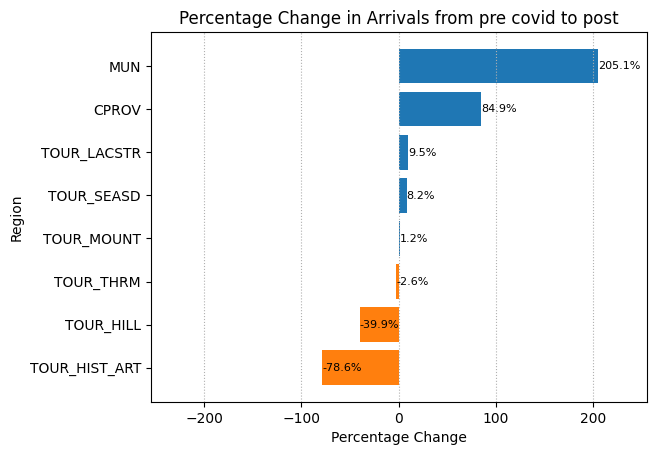

In [930]:
# Calculate the total arrivals for 2018+2019 and 2022+2023 for each region
arrivals_pre = arrivals_per_locality[arrivals_per_locality['TIME'].isin(['2017'])].groupby('TIPOITTER1A')['Value'].sum()
arrivals_post = arrivals_per_locality[arrivals_per_locality['TIME'].isin(['2023'])].groupby('TIPOITTER1A')['Value'].sum()

# Calculate the percentage change
percentage_change = ((arrivals_post - arrivals_pre) / arrivals_pre * 100).sort_values()
positive_change = percentage_change[percentage_change > 0]
negative_change = percentage_change[percentage_change < 0]

# Plot the percentage change
bars_neg = plt.barh(negative_change.index, negative_change.values, color='C1')
bars_pos = plt.barh(positive_change.index, positive_change.values, color='C0')

# Add percentage labels next to each bar
for bar in bars_neg:
  width = bar.get_width()
  plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.1f}%', ha='left', va='center', fontsize=8)

for bar in bars_pos:
  width = bar.get_width()
  plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.1f}%', ha='left', va='center', fontsize=8)

plt.xlabel("Percentage Change")
plt.ylabel("Region")
plt.title("Percentage Change in Arrivals from pre covid to post")
plt.grid(True, axis='x', linestyle=':')

max_change = percentage_change.abs().max()
plt.xlim(-max_change - 50, max_change + 50)  # Adjust x-axis limits for even spacing
plt.show()

## ARRIVALS PER MONTH

In [931]:
df = pd.read_csv('../data/csv/Tipo di località (IT1,122_54_DF_DCSC_TUR_6,1.0).csv')
df['OBS_VALUE'] = df['OBS_VALUE'] / 1000000
df.head()

DATAFLOW FREQ REF_AREA DATA_TYPE ADJUSTMENT  \
0  IT1:122_54_DF_DCSC_TUR_6(1.0)    A       IT        AR          N   
1  IT1:122_54_DF_DCSC_TUR_6(1.0)    A       IT        AR          N   
2  IT1:122_54_DF_DCSC_TUR_6(1.0)    A       IT        AR          N   
3  IT1:122_54_DF_DCSC_TUR_6(1.0)    A       IT        AR          N   
4  IT1:122_54_DF_DCSC_TUR_6(1.0)    A       IT        AR          N   

  TYPE_ACCOMMODATION ECON_ACTIVITY_NACE_2007 COUNTRY_RES_GUESTS LOCALITY_TYPE  \
0                ALL                 551_553                 IT           ALL   
1                ALL                 551_553                 IT           ALL   
2                ALL                 551_553                 IT           ALL   
3                ALL                 551_553                 IT           ALL   
4                ALL                 551_553                 IT           ALL   

  URBANIZ_DEGREE  ... NOTE_ECON_ACTIVITY_NACE_2007 NOTE_COUNTRY_RES_GUESTS  \
0            ALL  ...                          NaN                     NaN   
1            ALL  ...                          NaN                     NaN   
2            ALL  ...                          NaN                     NaN   
3            ALL  ...                          NaN                     NaN   
4            ALL  ...                          NaN                     NaN   

  NOTE_LOCALITY_TYPE  NOTE_URBANIZ_DEGREE  NOTE_COASTAL_AREA  \
0                NaN                  NaN                NaN   
1                NaN                  NaN                NaN   
2                NaN                  NaN                NaN   
3                NaN                  NaN                NaN   
4                NaN                  NaN                NaN   

   NOTE_SIZE_BY_NUMBER_ROOMS  NOTE_TIME_PERIOD  BASE_PER  UNIT_MEAS  UNIT_MULT  
0                        NaN               NaN       NaN        NaN        NaN  
1                        NaN               NaN       NaN        NaN        NaN  
2                        NaN               NaN       NaN        NaN        NaN  
3                        NaN               NaN       NaN        NaN        NaN  
4                        NaN               NaN       NaN        NaN        NaN  

[5 rows x 30 columns]

In [932]:
arrivals_per_month = df[(df['COUNTRY_RES_GUESTS'] == 'WORLD') & (df['TYPE_ACCOMMODATION'] == 'ALL') & (df['DATA_TYPE'] == 'AR') & (df['TIME_PERIOD'].apply(str).apply(len) > 4) & (df['LOCALITY_TYPE'] == 'ALL')]
arrivals = arrivals_per_month[['TIME_PERIOD', 'OBS_VALUE']].set_index('TIME_PERIOD')
months = arrivals.index.to_series().apply(lambda x: x.split('-')[1]).unique()
years = arrivals.index.to_series().apply(lambda x: x.split('-')[0]).unique()
[months, years]

[array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
        '12'], dtype=object),
 array(['2018', '2019', '2020', '2021', '2022', '2023'], dtype=object)]

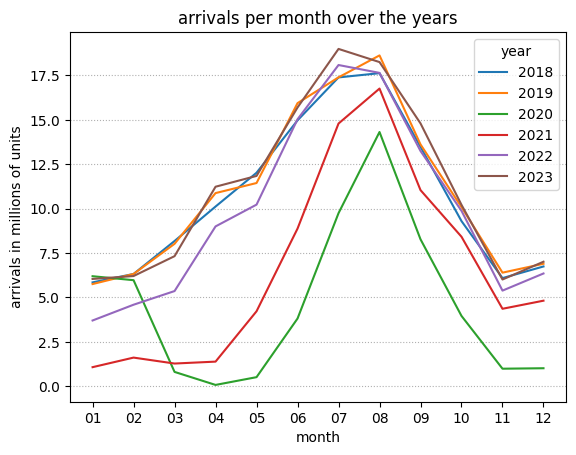

In [933]:
# fig, ax = plt.subplots(figsize=(12, 6))

for year in years:
  monthly_data = arrivals[arrivals.index.str.startswith(year)]
  plt.plot(monthly_data.index.str[-2:], monthly_data['OBS_VALUE'], label=year)

plt.ylabel("arrivals in millions of units")
plt.xlabel("month")
plt.title("arrivals per month over the years")
plt.legend(title="year")
plt.grid(True, axis='y', linestyle=':')

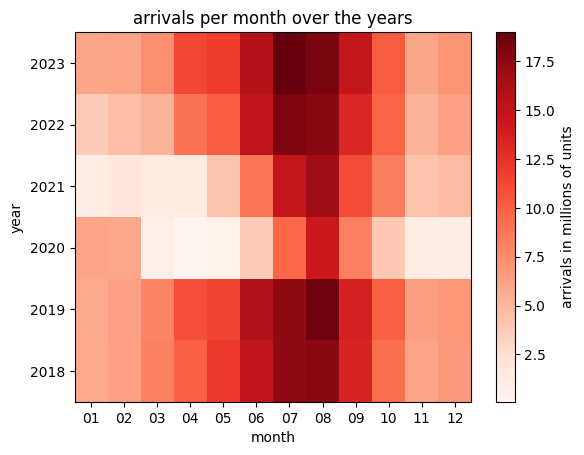

In [934]:
matrix = np.array([[arrivals.loc[f'{year}-{month}', 'OBS_VALUE'] if f'{year}-{month}' in arrivals.index else 0 for month in months] for year in years])
c = plt.pcolormesh(months, years, matrix, cmap='Reds')
plt.colorbar(c, label="arrivals in millions of units")
plt.xlabel("month")
plt.ylabel("year")
plt.title("arrivals per month over the years")
plt.show()

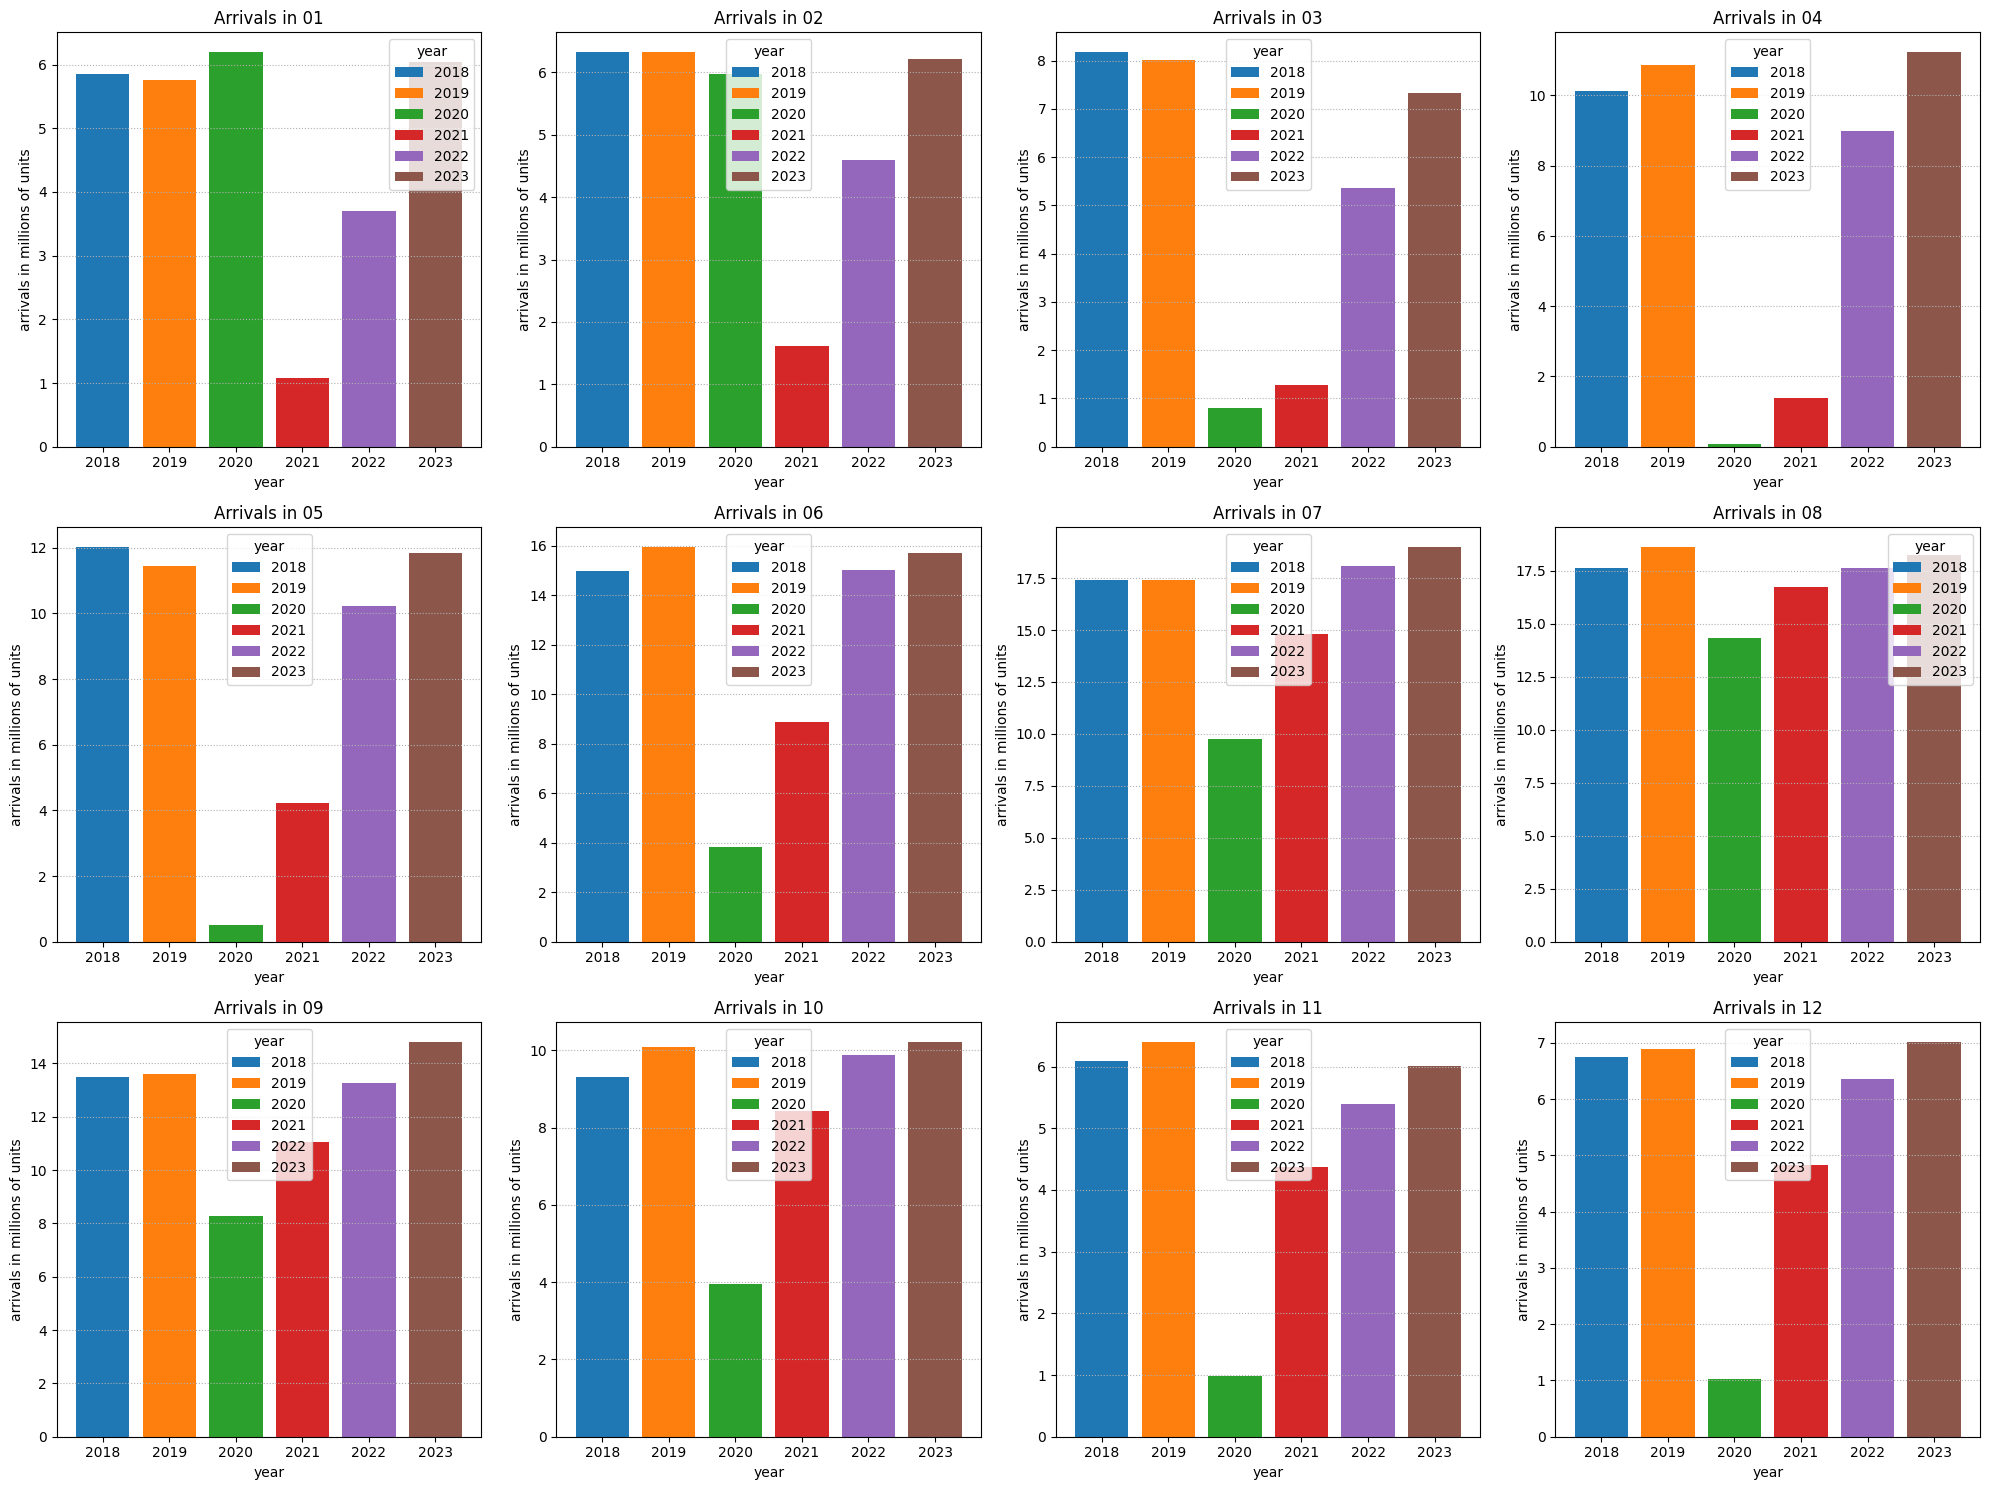

In [935]:
fig, axs = plt.subplots(3, 4, figsize=(20, 15))

for i, month in enumerate(months):
  ax = axs[i // 4, i % 4]
  for year in years:
    monthly_data = arrivals[(arrivals.index.str.endswith(month)) & (arrivals.index.str.startswith(year))]
    ax.bar(year, monthly_data['OBS_VALUE'], label=year)
  ax.set_title(f'Arrivals in {month}')
  ax.set_ylabel("arrivals in millions of units")
  ax.set_xlabel("year")
  ax.legend(title="year")
  ax.grid(True, axis='y', linestyle=':')

plt.tight_layout()
plt.show()


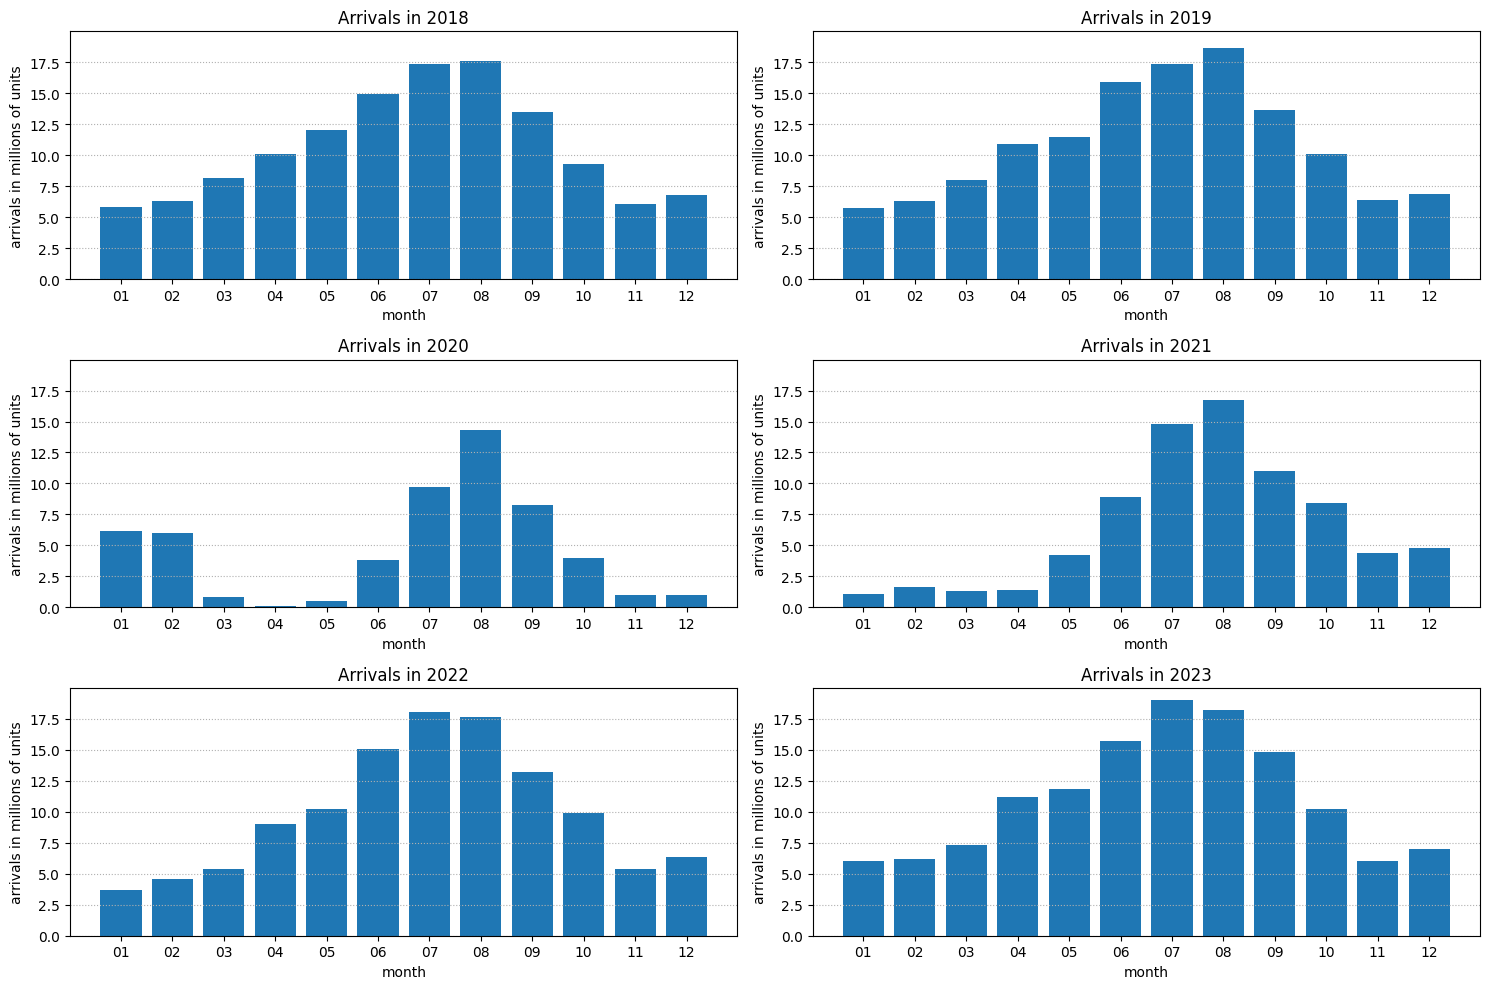

In [936]:
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

# Determine the maximum y-value for setting a common scale
max_y_value = arrivals['OBS_VALUE'].max()

for i, year in enumerate(years):
  ax = axs[i // 2, i % 2]
  monthly_data = arrivals[arrivals.index.str.startswith(year)]
  ax.bar(monthly_data.index.str[-2:], monthly_data['OBS_VALUE'])
  ax.set_title(f'Arrivals in {year}')
  ax.set_ylabel("arrivals in millions of units")
  ax.set_xlabel("month")
  ax.set_ylim(0, max_y_value+1)  # Set the same y-axis limit for all subplots
  ax.grid(True, axis='y', linestyle=':')

plt.tight_layout()
plt.show()

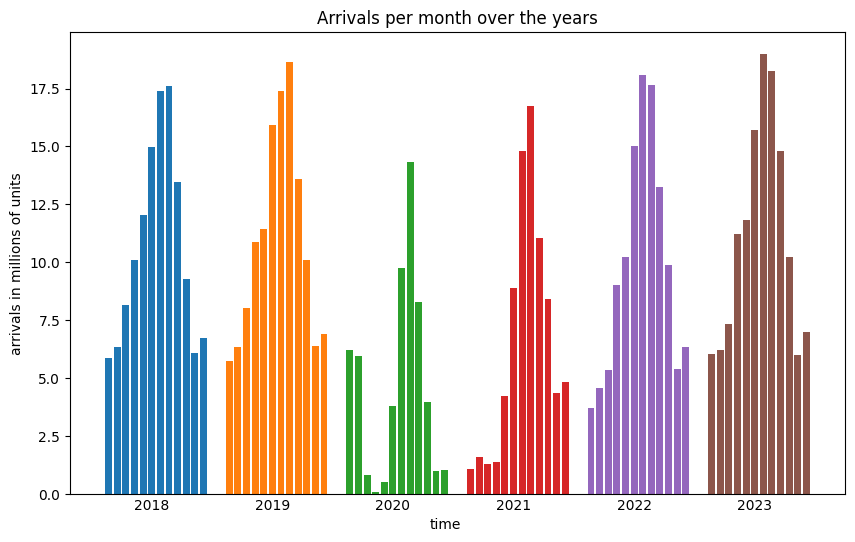

In [937]:
plt.figure(figsize=(10, 6))

for year in years:
  plt.text(f'{year}-06', -0.2, year, ha='center', va='top', fontsize=10)
  year_data = arrivals.loc[arrivals.index.str.startswith(year)]
  plt.bar(year_data.index, year_data['OBS_VALUE'])
  plt.axvline(x=f'{year}-0', color='gray', linestyle='--', alpha=0)
  plt.axvline(x=f'{year}-00', color='gray', linestyle='--', alpha=0)

plt.xticks([])

plt.figtext(0.5, 0.07, "time", ha='center', va='top', fontsize=10)
plt.ylabel("arrivals in millions of units")
plt.title("Arrivals per month over the years")
plt.grid(True, axis='x', linestyle=':')
plt.show()

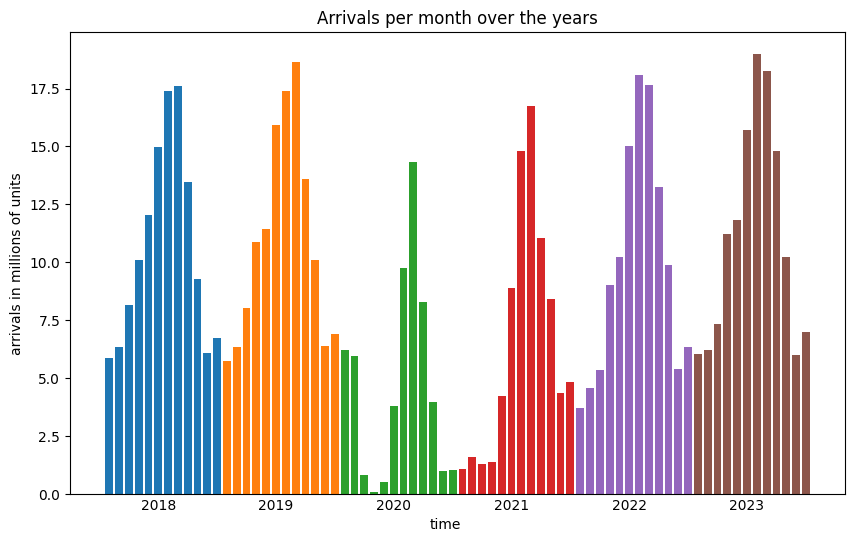

In [938]:
plt.figure(figsize=(10, 6))

for year in years:
  plt.text(f'{year}-06', -0.2, year, ha='center', va='top', fontsize=10)
  year_data = arrivals.loc[arrivals.index.str.startswith(year)]
  plt.bar(year_data.index, year_data['OBS_VALUE'])

plt.xticks([])

plt.figtext(0.5, 0.07, "time", ha='center', va='top', fontsize=10)
plt.ylabel("arrivals in millions of units")
plt.title("Arrivals per month over the years")
plt.grid(True, axis='x', linestyle=':')
plt.show()

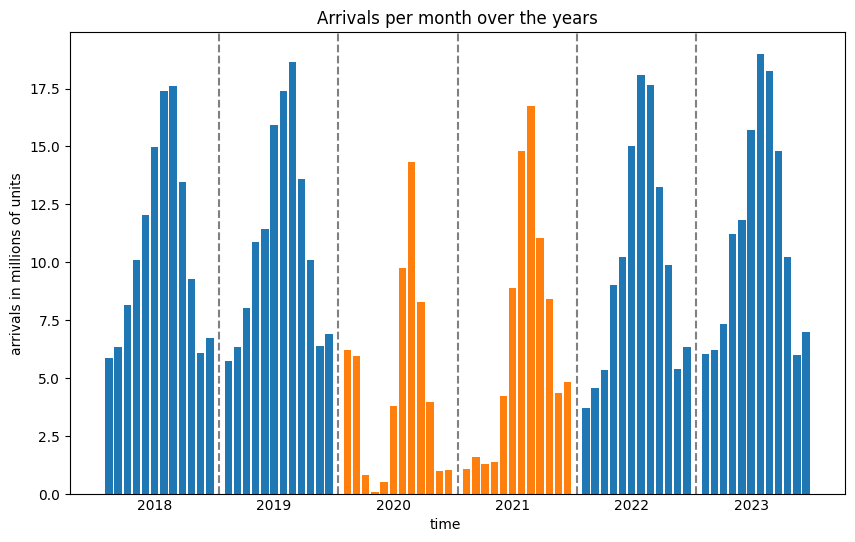

In [939]:
plt.figure(figsize=(10, 6))

for year in years:
  plt.text(f'{year}-06', -0.2, year, ha='center', va='top', fontsize=10)
  year_data = arrivals.loc[arrivals.index.str.startswith(year)]
  color = 'C1' if year in ['2020', '2021'] else 'C0'
  if year != min(years):
    plt.axvline(x=f'{year}-0', color='gray', linestyle='--')
  plt.bar(year_data.index, year_data['OBS_VALUE'], color=color)

plt.xticks([])
plt.figtext(0.5, 0.07, "time", ha='center', va='top', fontsize=10)
plt.ylabel("arrivals in millions of units")
plt.title("Arrivals per month over the years")
plt.show()

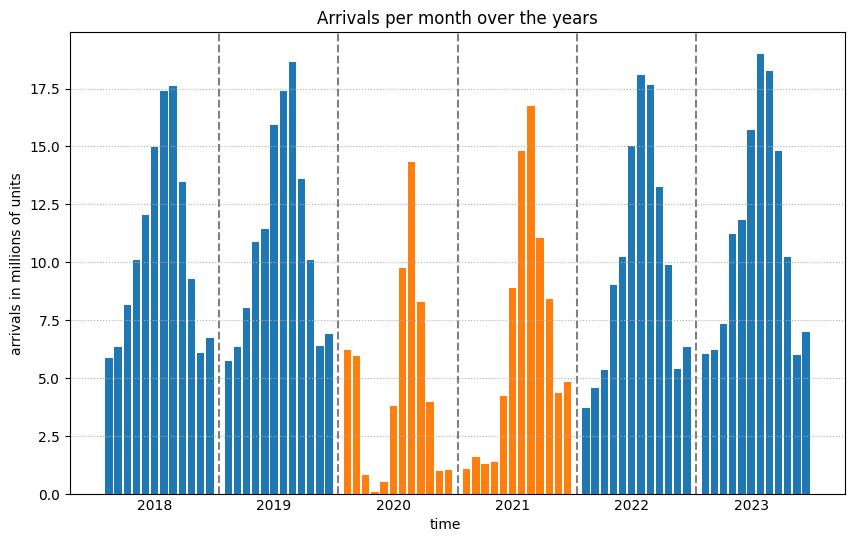

In [940]:
plt.figure(figsize=(10, 6))

for year in years:
  plt.text(f'{year}-06', -0.2, year, ha='center', va='top', fontsize=10)
  year_data = arrivals.loc[arrivals.index.str.startswith(year)]
  color = 'C1' if year in ['2020', '2021'] else 'C0'
  if year != min(years):
    plt.axvline(x=f'{year}-0', color='gray', linestyle='--')
  plt.bar(year_data.index, year_data['OBS_VALUE'], color=color)

plt.xticks([])
plt.figtext(0.5, 0.07, "time", ha='center', va='top', fontsize=10)
plt.ylabel("arrivals in millions of units")
plt.grid(True, axis='y', linestyle=':')
plt.title("Arrivals per month over the years")
plt.show()

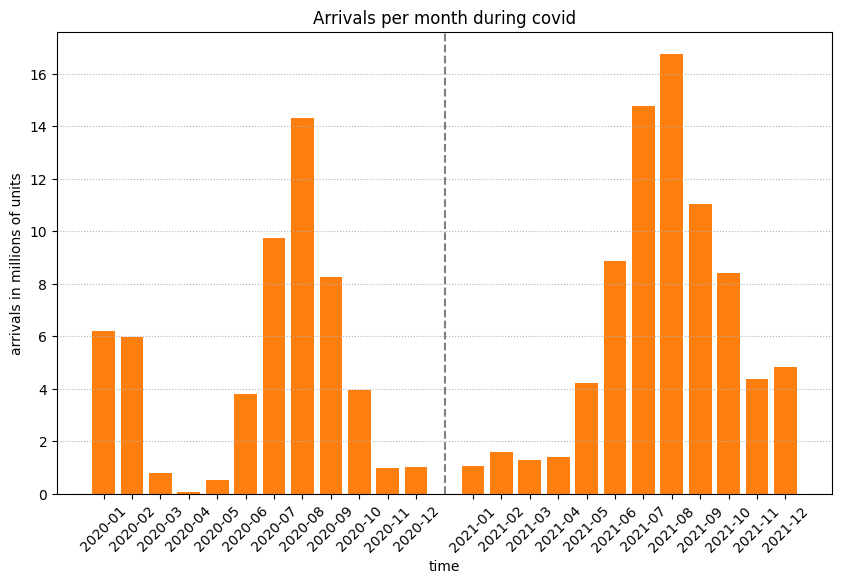

In [941]:
plt.figure(figsize=(10, 6))

for year in ['2020', '2021']:
  year_data = arrivals.loc[arrivals.index.str.startswith(year)]
  if year != '2020':
    plt.axvline(x=f'{year}-0', color='gray', linestyle='--')
  plt.bar(year_data.index, year_data['OBS_VALUE'], color='C1', label=year)

xticks = plt.xticks()
plt.xticks([tick for tick in xticks[0] if '2021-0' != xticks[1][tick].get_text()], rotation=45)
plt.ylabel("arrivals in millions of units")
plt.xlabel("time")
plt.title("Arrivals per month during covid")
plt.grid(True, axis='y', linestyle=':')
plt.show()

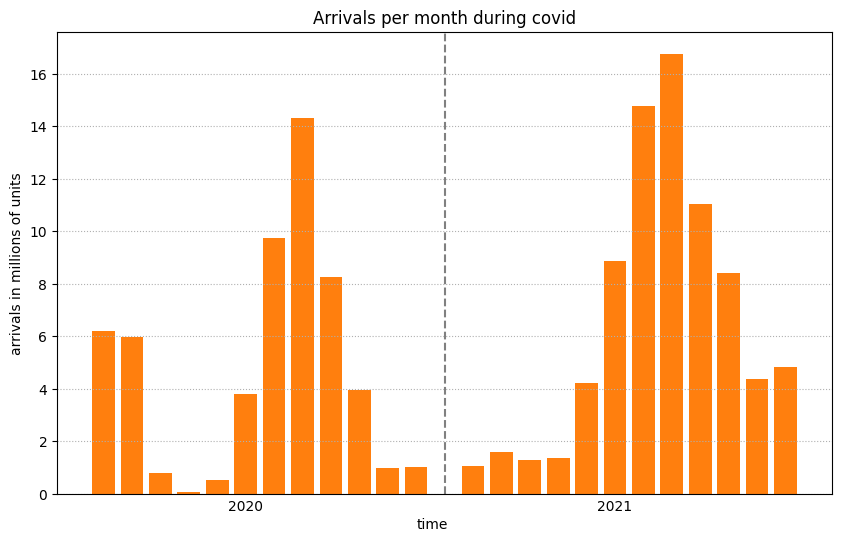

In [942]:
plt.figure(figsize=(10, 6))

for year in ['2020', '2021']:
  plt.text(f'{year}-06', -0.2, year, ha='center', va='top', fontsize=10)
  year_data = arrivals.loc[arrivals.index.str.startswith(year)]
  if year != '2020':
    plt.axvline(x=f'{year}-0', color='gray', linestyle='--')
  plt.bar(year_data.index, year_data['OBS_VALUE'], color='C1', label=year)

plt.xticks([])
plt.figtext(0.5, 0.07, "time", ha='center', va='top', fontsize=10)
plt.ylabel("arrivals in millions of units")
plt.title("Arrivals per month during covid")
plt.grid(True, axis='y', linestyle=':')
plt.show()

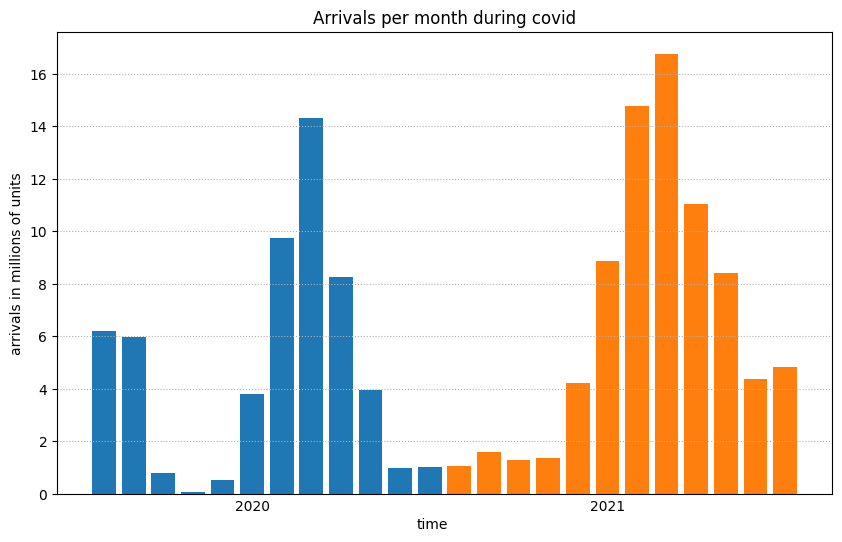

In [943]:
plt.figure(figsize=(10, 6))

for year in ['2020', '2021']:
  plt.text(f'{year}-06', -0.2, year, ha='center', va='top', fontsize=10)
  year_data = arrivals.loc[arrivals.index.str.startswith(year)]
  plt.bar(year_data.index, year_data['OBS_VALUE'])

plt.xticks([])
plt.figtext(0.5, 0.07, "time", ha='center', va='top', fontsize=10)
plt.ylabel("arrivals in millions of units")
plt.title("Arrivals per month during covid")
plt.grid(True, axis='y', linestyle=':')
plt.show()

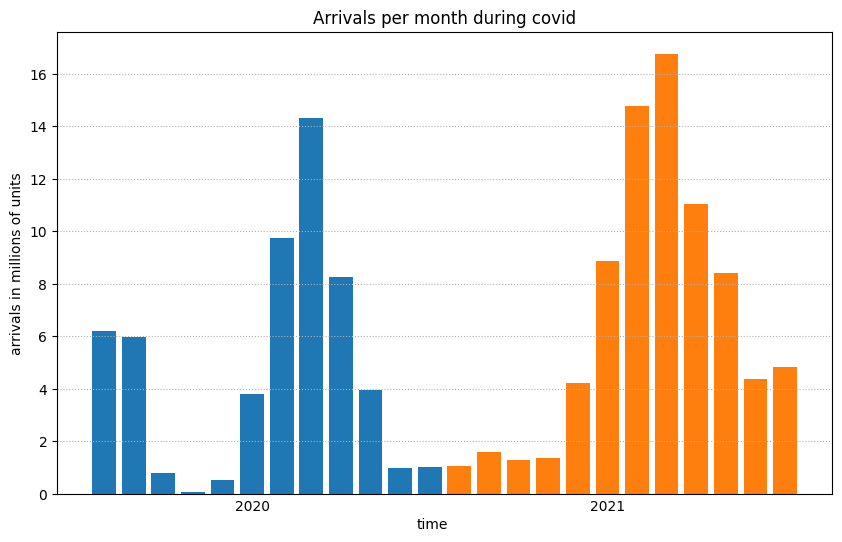

In [944]:
plt.figure(figsize=(10, 6))

for year in ['2020', '2021']:
  plt.text(f'{year}-06', -0.2, year, ha='center', va='top', fontsize=10)
  year_data = arrivals.loc[arrivals.index.str.startswith(year)]
  plt.bar(year_data.index, year_data['OBS_VALUE'])

plt.xticks([])
plt.figtext(0.5, 0.07, "time", ha='center', va='top', fontsize=10)
plt.ylabel("arrivals in millions of units")
plt.title("Arrivals per month during covid")
plt.grid(True, axis='y', linestyle=':')
plt.show()

## ARRIVALS PER REGION

In [945]:
df = pd.read_csv('../data/csv/Movimento dei clienti negli esercizi ricettivi per tipo di esercizio - mensili (IT1,122_54_DF_DCSC_TUR_3,1.0).csv')
df['OBS_VALUE'] = df['OBS_VALUE'] / 1000000
df.head()

DATAFLOW FREQ REF_AREA DATA_TYPE ADJUSTMENT  \
0  IT1:122_54_DF_DCSC_TUR_3(1.0)    A       IT        AR          N   
1  IT1:122_54_DF_DCSC_TUR_3(1.0)    A       IT        AR          N   
2  IT1:122_54_DF_DCSC_TUR_3(1.0)    A       IT        AR          N   
3  IT1:122_54_DF_DCSC_TUR_3(1.0)    A       IT        AR          N   
4  IT1:122_54_DF_DCSC_TUR_3(1.0)    A       IT        AR          N   

  TYPE_ACCOMMODATION ECON_ACTIVITY_NACE_2007 COUNTRY_RES_GUESTS LOCALITY_TYPE  \
0                ALL                 551_553                 IT           ALL   
1                ALL                 551_553                 IT           ALL   
2                ALL                 551_553                 IT           ALL   
3                ALL                 551_553                 IT           ALL   
4                ALL                 551_553                 IT           ALL   

  URBANIZ_DEGREE  ... NOTE_ECON_ACTIVITY_NACE_2007 NOTE_COUNTRY_RES_GUESTS  \
0            ALL  ...                          NaN                     NaN   
1            ALL  ...                          NaN                     NaN   
2            ALL  ...                          NaN                     NaN   
3            ALL  ...                          NaN                     NaN   
4            ALL  ...                          NaN                     NaN   

  NOTE_LOCALITY_TYPE  NOTE_URBANIZ_DEGREE NOTE_COASTAL_AREA  \
0                NaN                  NaN               NaN   
1                NaN                  NaN               NaN   
2                NaN                  NaN               NaN   
3                NaN                  NaN               NaN   
4                NaN                  NaN               NaN   

   NOTE_SIZE_BY_NUMBER_ROOMS  NOTE_TIME_PERIOD  BASE_PER  UNIT_MEAS  UNIT_MULT  
0                        NaN               NaN       NaN        NaN        NaN  
1                        NaN               NaN       NaN        NaN        NaN  
2                        NaN               NaN       NaN        NaN        NaN  
3                        NaN               NaN       NaN        NaN        NaN  
4                        NaN               NaN       NaN        NaN        NaN  

[5 rows x 30 columns]

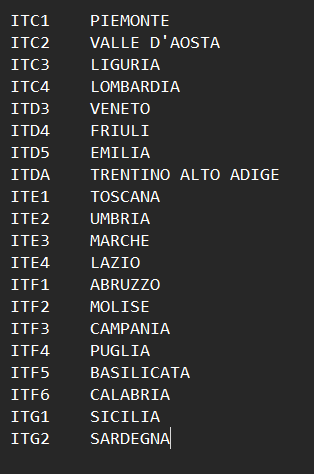

In [946]:
arrivals_per_region = df[(df['COUNTRY_RES_GUESTS'] == 'WORLD') & (df['REF_AREA'] != 'IT') & (df['DATA_TYPE'] == 'AR') & (df['TIME_PERIOD'].apply(str).apply(len) <= 4) & (df['TYPE_ACCOMMODATION'] == 'ALL')]
arrivals = arrivals_per_region[['REF_AREA', 'OBS_VALUE', 'TIME_PERIOD']]
regions = arrivals['REF_AREA'].unique()
years = arrivals['TIME_PERIOD'].unique()

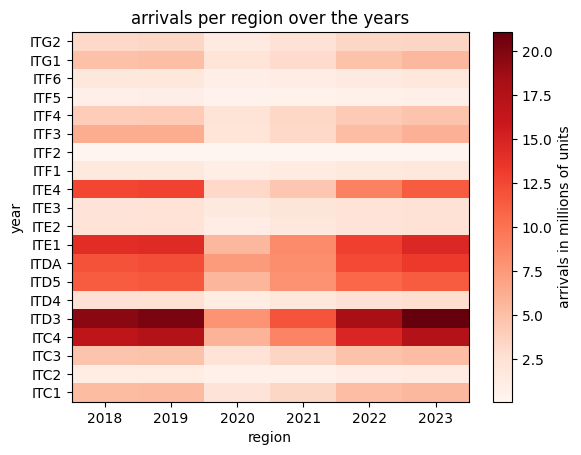

In [947]:
fig, ax = plt.subplots()

# Create a matrix with zeros
matrix = np.zeros((len(regions), len(years)))

# Fill the matrix with the OBS_VALUE data
for i, region in enumerate(regions):
  for j, year in enumerate(years):
    value = arrivals[(arrivals['REF_AREA'] == region) & (arrivals['TIME_PERIOD'] == year)]['OBS_VALUE']
    if not value.empty:
      matrix[i, j] = value.values[0]

c = ax.pcolormesh(years, regions, matrix, cmap='Reds')
fig.colorbar(c, ax=ax, label="arrivals in millions of units")
plt.xlabel("region")
plt.ylabel("year")
plt.title("arrivals per region over the years")
plt.show()

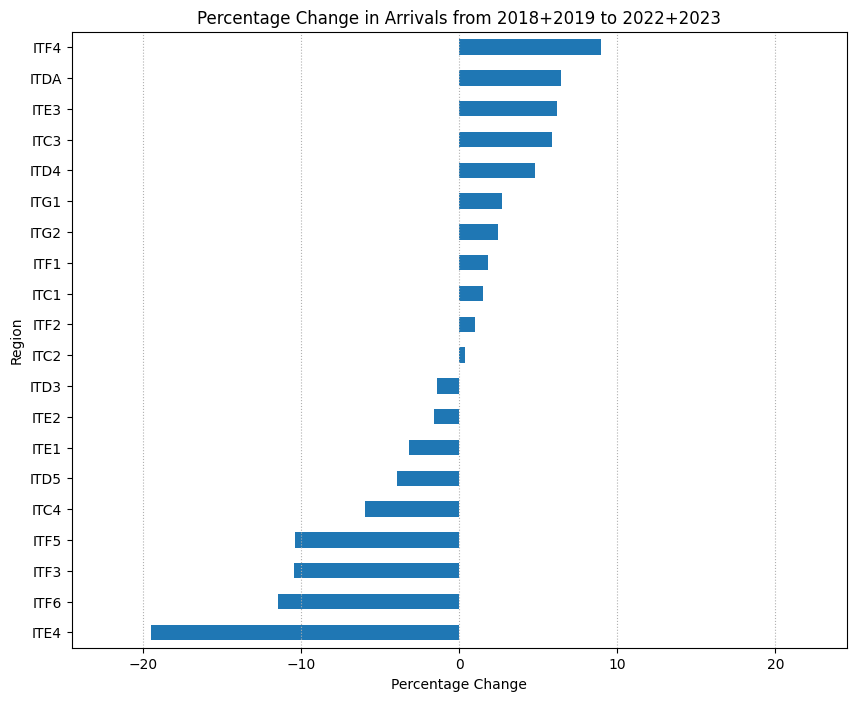

In [ ]:
# Calculate the total arrivals for 2018+2019 and 2022+2023 for each region
arrivals_2018_2019 = arrivals[arrivals['TIME_PERIOD'].isin(['2018', '2019'])].groupby('REF_AREA')['OBS_VALUE'].sum()
arrivals_2022_2023 = arrivals[arrivals['TIME_PERIOD'].isin(['2022', '2023'])].groupby('REF_AREA')['OBS_VALUE'].sum()

# Calculate the percentage change
percentage_change = ((arrivals_2022_2023 - arrivals_2018_2019) / arrivals_2018_2019) * 100

# Plot the percentage change
percentage_change.sort_values().plot(kind='barh', figsize=(10, 8), color='C0')
plt.xlabel("Percentage Change")
plt.ylabel("Region")
plt.title("Percentage Change in Arrivals from 2018+2019 to 2022+2023")
plt.grid(True, axis='x', linestyle=':')

max_change = percentage_change.abs().max()
plt.xlim(-max_change - 5, max_change + 5)  # Adjust x-axis limits for even spacing
plt.show()

## HISTORICAL ARRIVALS

In [743]:
df = pd.read_csv('../data/csv/Arrivi, presenze, permanenza media - Annuali  (DCSC_TUR_09122024154118473).csv')
df.head()

ITTER107 Territorio TIPO_DATO7 Indicatori CORREZ   Correzione  \
0       IT     Italia         AR    arrivi       N  dati grezzi   
1       IT     Italia         AR    arrivi       N  dati grezzi   
2       IT     Italia         AR    arrivi       N  dati grezzi   
3       IT     Italia         AR    arrivi       N  dati grezzi   
4       IT     Italia         AR    arrivi       N  dati grezzi   

  TIPO_ALLOGGIO2     Tipologia di esercizio ATECO_2007  \
0            ALL  totale esercizi ricettivi        551   
1            ALL  totale esercizi ricettivi        551   
2            ALL  totale esercizi ricettivi        551   
3            ALL  totale esercizi ricettivi        551   
4            ALL  totale esercizi ricettivi        551   

                    Ateco 2007 ISO Paese di residenza dei clienti     TIME  \
0  alberghi e strutture simili  IT                         Italia  2013-01   
1  alberghi e strutture simili  IT                         Italia  2013-02   
2  alberghi e strutture simili  IT                         Italia  2013-03   
3  alberghi e strutture simili  IT                         Italia  2013-04   
4  alberghi e strutture simili  IT                         Italia  2013-05   

  Seleziona periodo      Value  Flag Codes  Flags  
0          Gen-2013  2536971.0         NaN    NaN  
1          Feb-2013  2615788.0         NaN    NaN  
2          Mar-2013  3254552.0         NaN    NaN  
3          Apr-2013  3238532.0         NaN    NaN  
4          Mag-2013  3374001.0         NaN    NaN

Value
TIME            
2013  103.862530
2014  106.552352
2015  113.392137
2016  116.944243
2017  123.195556

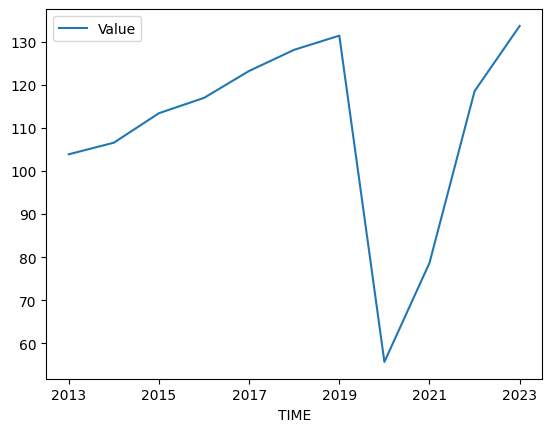

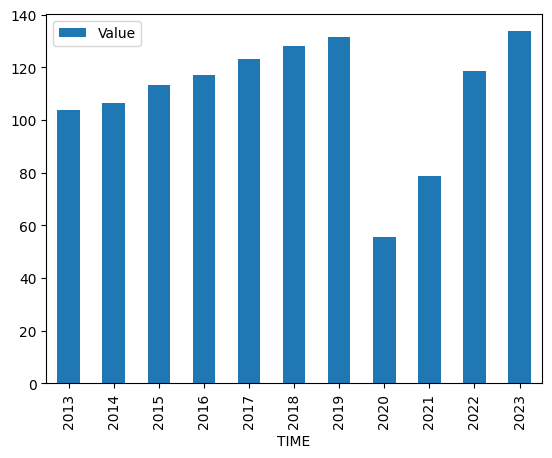

In [744]:
arrivals_per_year = df[(df['ISO'] == 'WORLD') & (df['TIPO_DATO7'] == 'AR') & (df['TIME'].apply(str).apply(len) <= 4) & (df['Paese di residenza dei clienti'] == 'Mondo')]
arrivals = arrivals_per_year[['Value', 'TIME']].set_index('TIME')
arrivals['Value'] = arrivals['Value'] / 1000000
arrivals.plot()
arrivals.plot.bar()
arrivals.head()

Value
TIME            
2013  376.785615
2014  377.770806
2015  392.874070
2016  402.962113
2017  420.629155

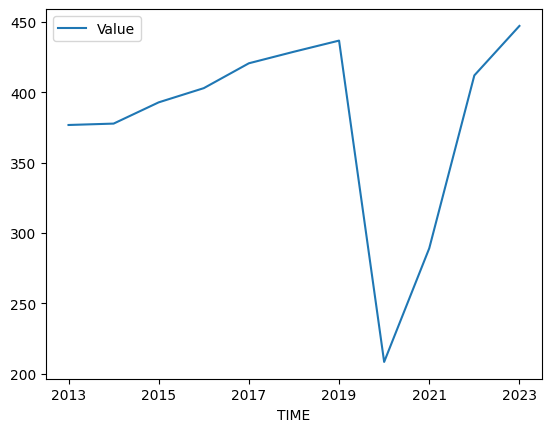

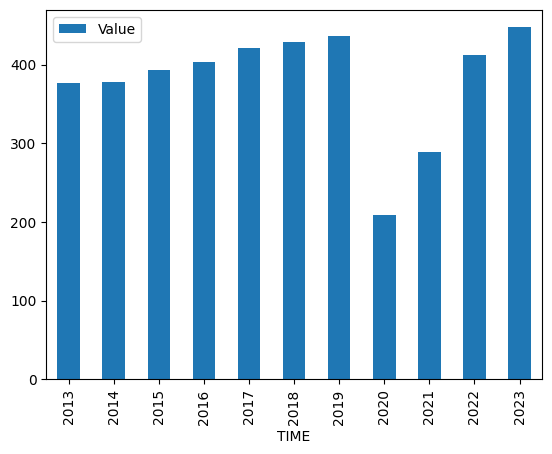

In [745]:
nights_spent_per_year = df[(df['ISO'] == 'WORLD') & (df['TIPO_DATO7'] == 'NI') & (df['TIME'].apply(str).apply(len) <= 4) & (df['Paese di residenza dei clienti'] == 'Mondo')]
nights_spent = nights_spent_per_year[['Value', 'TIME']].set_index('TIME')
nights_spent['Value'] = nights_spent['Value'] / 1000000
nights_spent.plot()
nights_spent.plot.bar()
nights_spent.head()

Value
TIME          
2013  3.775000
2014  3.666667
2015  3.577778
2016  3.500000
2017  3.458333

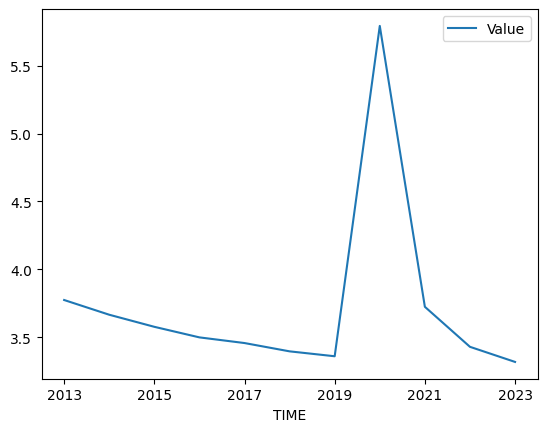

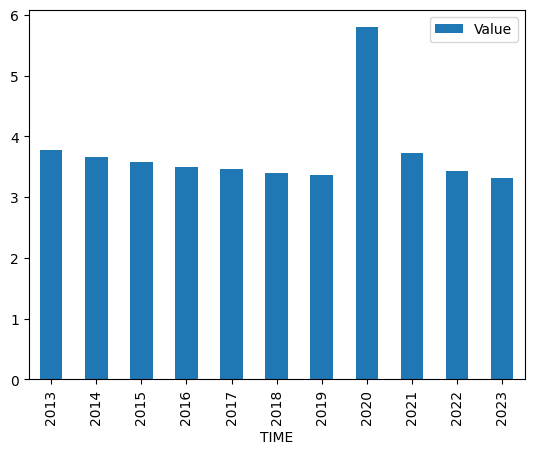

In [746]:
avg_stay_per_month = df[(df['ISO'] == 'WORLD') & (df['TIPO_DATO7'] == 'PM') & (df['Paese di residenza dei clienti'] == 'Mondo')]

avg_stay = avg_stay_per_month.copy()
avg_stay['YEAR'] = avg_stay['TIME'].str[:4]
avg_stay = avg_stay.groupby('YEAR')['Value'].mean().reset_index()
avg_stay.columns = ['TIME', 'Value']
avg_stay = avg_stay.set_index('TIME')
avg_stay.plot()
avg_stay.plot.bar()
avg_stay.head()

(0.0, 140.31854445)

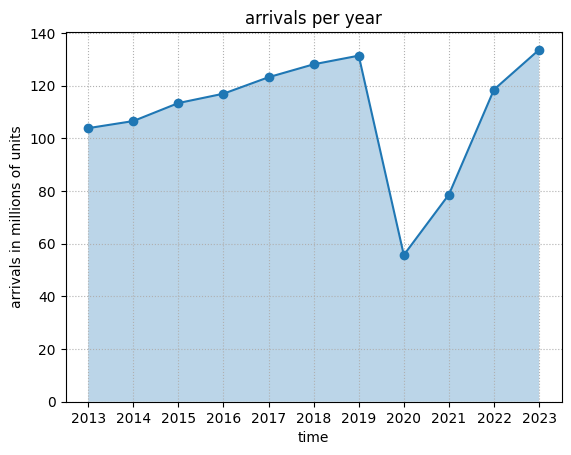

In [747]:
plt.plot(arrivals.index, arrivals['Value'], 'o-')
plt.fill_between(arrivals.index, arrivals['Value'], 0, alpha=0.3)
plt.ylabel("arrivals in millions of units")
plt.xlabel("time")
plt.title("arrivals per year")
plt.grid(True, linestyle=':')
plt.ylim(bottom=0)

(0.0, 469.52855145)

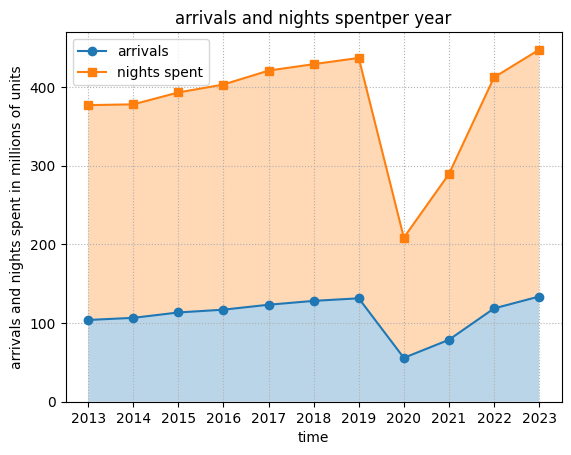

In [748]:
plt.plot(arrivals.index, arrivals['Value'], 'o-', label="arrivals")
plt.fill_between(arrivals.index, arrivals['Value'], 0, alpha=0.3)
plt.plot(nights_spent.index, nights_spent['Value'], 's-', label="nights spent")
plt.fill_between(arrivals.index, arrivals['Value'], nights_spent['Value'], alpha=0.3)

plt.ylabel("arrivals and nights spent in millions of units")
plt.xlabel("time")
plt.title("arrivals and nights spentper year")
plt.grid(True, linestyle=':')
plt.legend()
plt.ylim(bottom=0)

(0.0, 466.74344455)

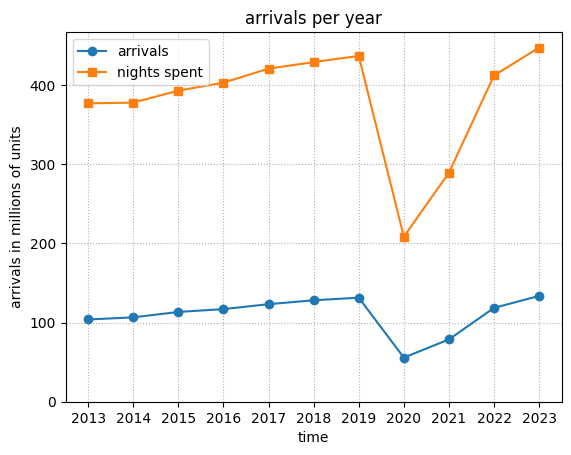

In [749]:
plt.plot(arrivals.index, arrivals['Value'], 'o-', label="arrivals")
plt.plot(nights_spent.index, nights_spent['Value'], 's-', label="nights spent")

plt.ylabel("arrivals in millions of units")
plt.xlabel("time")
plt.title("arrivals per year")
plt.grid(True, linestyle=':')
plt.legend()
plt.ylim(bottom=0)

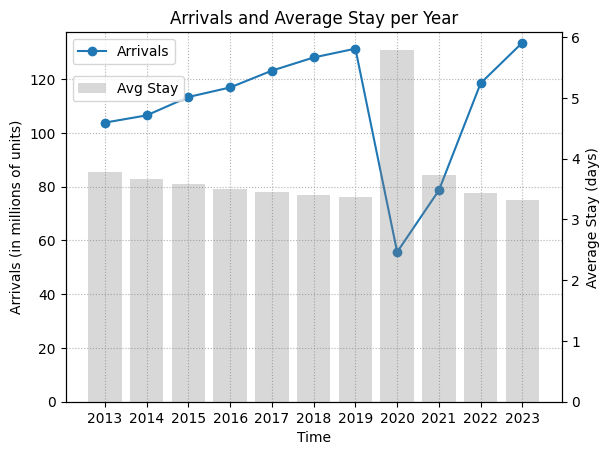

In [750]:
fig, ax1 = plt.subplots()

# Plotting arrivals and nights spent
ax1.plot(arrivals.index, arrivals['Value'], 'o-', label='Arrivals')
ax1.set_ylabel("Arrivals (in millions of units)")
ax1.set_xlabel("Time")
ax1.legend(loc='upper left')
ax1.grid(True, linestyle=':')
ax1.set_ylim(bottom=0)

# Creating a secondary y-axis for avg_stay
ax2 = ax1.twinx()
ax2.bar(avg_stay.index, avg_stay['Value'], alpha=0.3, color='gray', label='Avg Stay')
ax2.set_ylabel("Average Stay (days)")
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.9))

plt.title("Arrivals and Average Stay per Year")
plt.show()

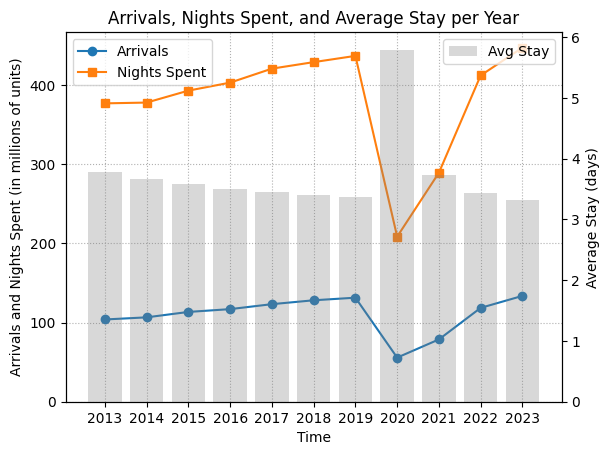

In [751]:
fig, ax1 = plt.subplots()

# Plotting arrivals and nights spent
ax1.plot(arrivals.index, arrivals['Value'], 'o-', label='Arrivals')
ax1.plot(nights_spent.index, nights_spent['Value'], 's-', label='Nights Spent')
ax1.set_ylabel("Arrivals and Nights Spent (in millions of units)")
ax1.set_xlabel("Time")
ax1.legend()
ax1.grid(True, linestyle=':')
ax1.set_ylim(bottom=0)

# Creating a secondary y-axis for avg_stay
ax2 = ax1.twinx()
ax2.bar(avg_stay.index, avg_stay['Value'], alpha=0.3, color='gray', label='Avg Stay')
ax2.set_ylabel("Average Stay (days)")
ax2.legend()

plt.title("Arrivals, Nights Spent, and Average Stay per Year")
plt.show()

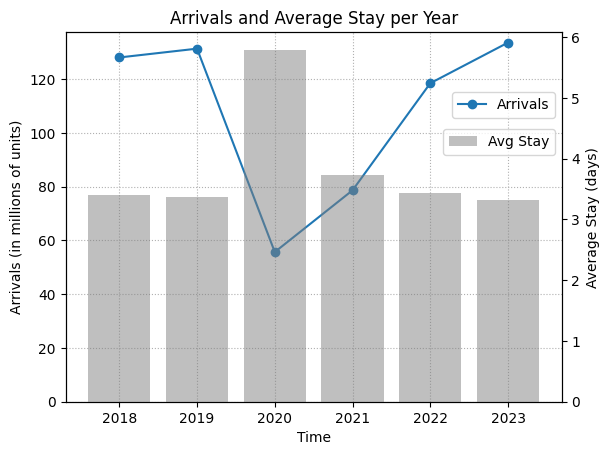

In [770]:
arrivals_x = arrivals[arrivals.index >= '2018']
avg_stay_x = avg_stay[avg_stay.index >= '2018']

fig, ax1 = plt.subplots()

# Plotting arrivals and nights spent
ax1.plot(arrivals_x.index, arrivals_x['Value'], 'o-', label='Arrivals')
ax1.set_ylabel("Arrivals (in millions of units)")
ax1.set_xlabel("Time")
ax1.legend(loc='lower right', bbox_to_anchor=(1, 0.75))
ax1.grid(True, linestyle=':')
ax1.set_ylim(bottom=0)

# Creating a secondary y-axis for avg_stay
ax2 = ax1.twinx()
ax2.bar(avg_stay_x.index, avg_stay_x['Value'], alpha=0.5, color='gray', label='Avg Stay')
ax2.set_ylabel("Average Stay (days)")
ax2.legend(loc='lower right', bbox_to_anchor=(1, 0.65))


plt.title("Arrivals and Average Stay per Year")
plt.show()

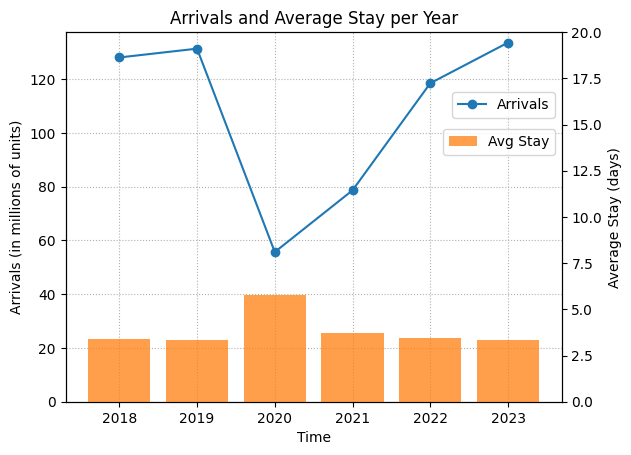

In [776]:
arrivals_x = arrivals[arrivals.index >= '2018']
avg_stay_x = avg_stay[avg_stay.index >= '2018']

fig, ax1 = plt.subplots()

# Plotting arrivals and nights spent
ax1.plot(arrivals_x.index, arrivals_x['Value'], 'o-', label='Arrivals')
ax1.set_ylabel("Arrivals (in millions of units)")
ax1.set_xlabel("Time")
ax1.legend(loc='lower right', bbox_to_anchor=(1, 0.75))
ax1.grid(True, linestyle=':')
ax1.set_ylim(bottom=0)

# Creating a secondary y-axis for avg_stay
ax2 = ax1.twinx()
ax2.bar(avg_stay_x.index, avg_stay_x['Value'], color='C1', alpha=0.75, label='Avg Stay')
ax2.set_ylabel("Average Stay (days)")
ax2.legend(loc='lower right', bbox_to_anchor=(1, 0.65))
ax2.set_ylim(0, 20)


plt.title("Arrivals and Average Stay per Year")
plt.show()

## WORLD CLOUD

In [ ]:
from PIL import Image
from wordcloud import WordCloud

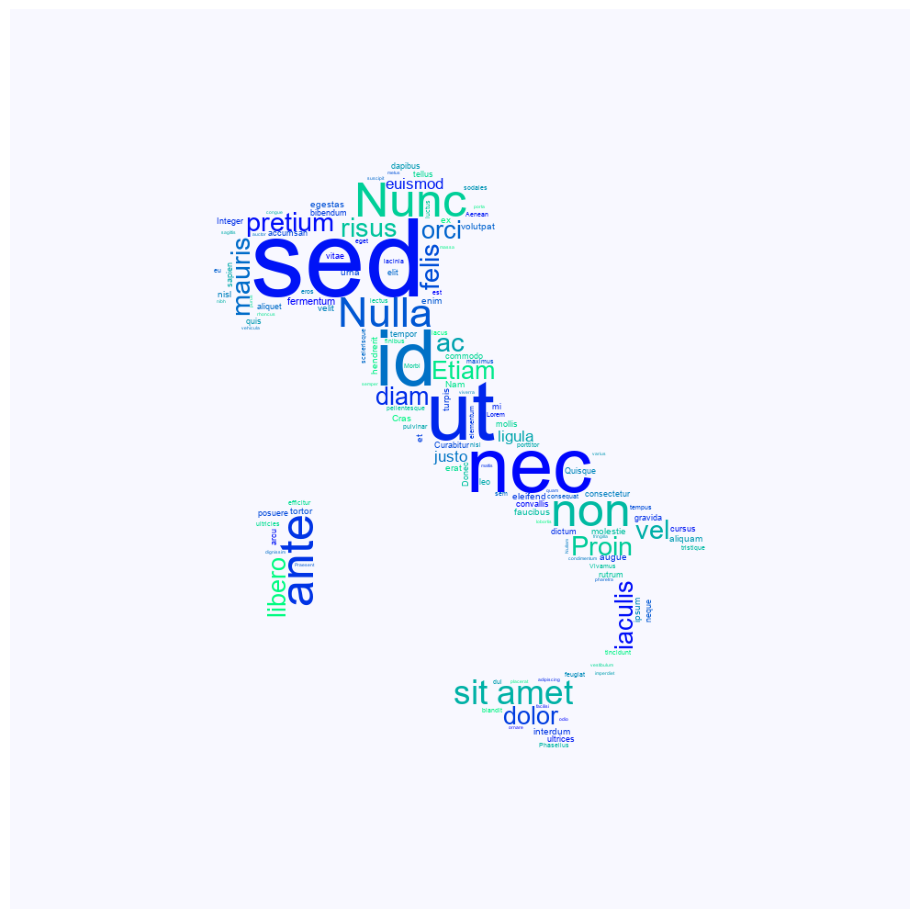

In [ ]:
txt = open("../presentazione/presentazione.txt").read()
img = np.array(Image.open("./map.png"))

plt.figure(figsize = (16,9))
wordcloud = WordCloud(mask=img, background_color="GhostWhite", colormap="winter", font_path="arial").generate(txt)
plt.imshow(wordcloud)

plt.axis("off")
plt.tight_layout(pad=0)
plt.show()